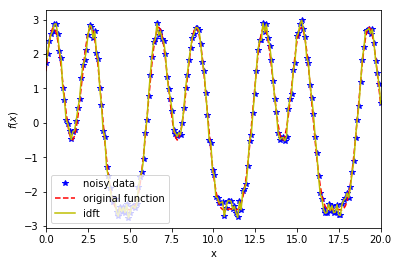

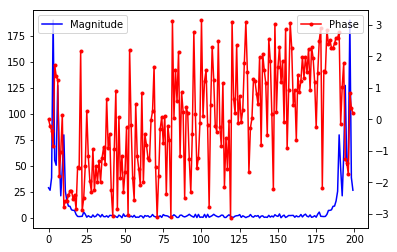

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from cmath import exp, pi

def dft(y):
    '''
    This is a code to do decrete Fourier transform
    '''    
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

def idft(c):
    '''
    This is a code to do inverse Fourier transform
    '''
    N = len(c)
    y = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            y[k] += c[n]*exp(2j*pi*k*n/N)
    return y

#define the function
f = lambda x: 2*np.sin(x) + 1.5*np.cos(2*x) + np.sin(3*x)

#define the paramters for the plot
a,b = 0,20
npoints = 200

#create the initial sample points (x,y)
x = np.linspace(a,b,npoints)
y = f(x) + 0.5*(np.random.rand(npoints) - 0.5)

#performat DFT and inverse dft calculations
c = dft(y)    
y1 = idft(c).real/npoints 

#make the plot
plt.plot(x,y, 'b*', label='noisy data')
plt.plot(x,f(x), 'r--', label='original function')
plt.plot(x,y1, 'y', label='idft')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.legend(loc='lower left')
plt.show()

#plot the points after DFT data
fig, ax1 = plt.subplots()
ax1.plot(np.abs(c), 'b-', label='Magnitude')

ax2 = ax1.twinx()
ax2.plot(np.angle(c), 'r.-', label='Phase')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

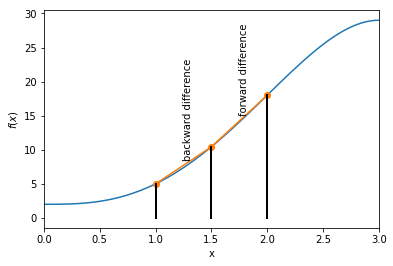

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: -x**4 + 4*x**3 + 2

#define the parameters
x_min, x_max = 0, 3
npoints = 100
x0 = (x_min+x_max)/2
deltax = 0.5

#draw the plot
x = np.linspace(x_min, x_max, npoints)
plt.plot(x,f(x))

#draw the derivative
x_1 = np.array([x0-deltax, x0, x0+deltax])
plt.plot(x_1,f(x_1),'-o')
for point in x_1:
    linex, liney = [point, point], [0, f(point)]
    plt.plot(linex, liney, color='black', linewidth=2.0)    

plt.text(x_1[0]+deltax/2, f(x_1[0]+deltax/2)+1, r'backward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)    
plt.text(x_1[1]+deltax/2, f(x_1[1]+deltax/2)+1, r'forward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)    

    
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([0,3])
plt.show()

In [10]:
def calc_forward_backward_central_differences_and_second_derivative(a_function, point_of_interest, step_size):
    f = a_function
    x_sub_i = point_of_interest
    delta_x = step_size
    h = delta_x
    forward_difference = f(x_sub_i + h) - f(x_sub_i)
    backward_difference =  f(x_sub_i) - f(x_sub_i - h)
    central_difference = ( f(x_sub_i + h) - f(x_sub_i - h) ) / (2*h)
    second_derivative = ( f(x_sub_i + h) - 2*f(x_sub_i) + f(x_sub_i - h) ) / (h**2)
    print("forward difference is ", forward_difference)
    print("backward difference is ", backward_difference)
    print("central difference is ", central_difference)
    print("second derivative is ", second_derivative)
    print()
    
calc_forward_backward_central_differences_and_second_derivative(lambda x: x**2 + (2*x), point_of_interest=3, step_size=1)
calc_forward_backward_central_differences_and_second_derivative(lambda x: -x**4 + (4*x**3) + 2, point_of_interest=2, step_size=1)

forward difference is  9
backward difference is  7
central difference is  8.0
second derivative is  2.0

forward difference is  11
backward difference is  13
central difference is  12.0
second derivative is  -2.0



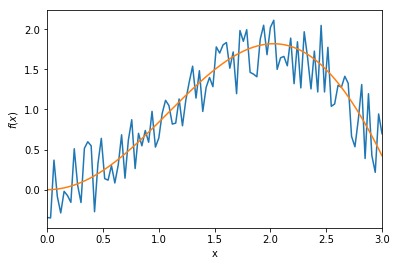

In [11]:
#a small program to generate random noise

import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5
plt.plot(x,y)
plt.plot(x,f(x))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()

In [82]:
from scipy import integrate
from numpy import pi, exp

f = lambda x: x * x
integrate.quad(f, 0, 3)

f = lambda x: (x**4)*exp(x) / (exp(x) - 1)**2
a_tuple = integrate.quad(f, 0, 1)
integral_under_curve = a_tuple[0]
print("integral under curve is", integral_under_curve)
            

integral under curve is 0.3172440452344265


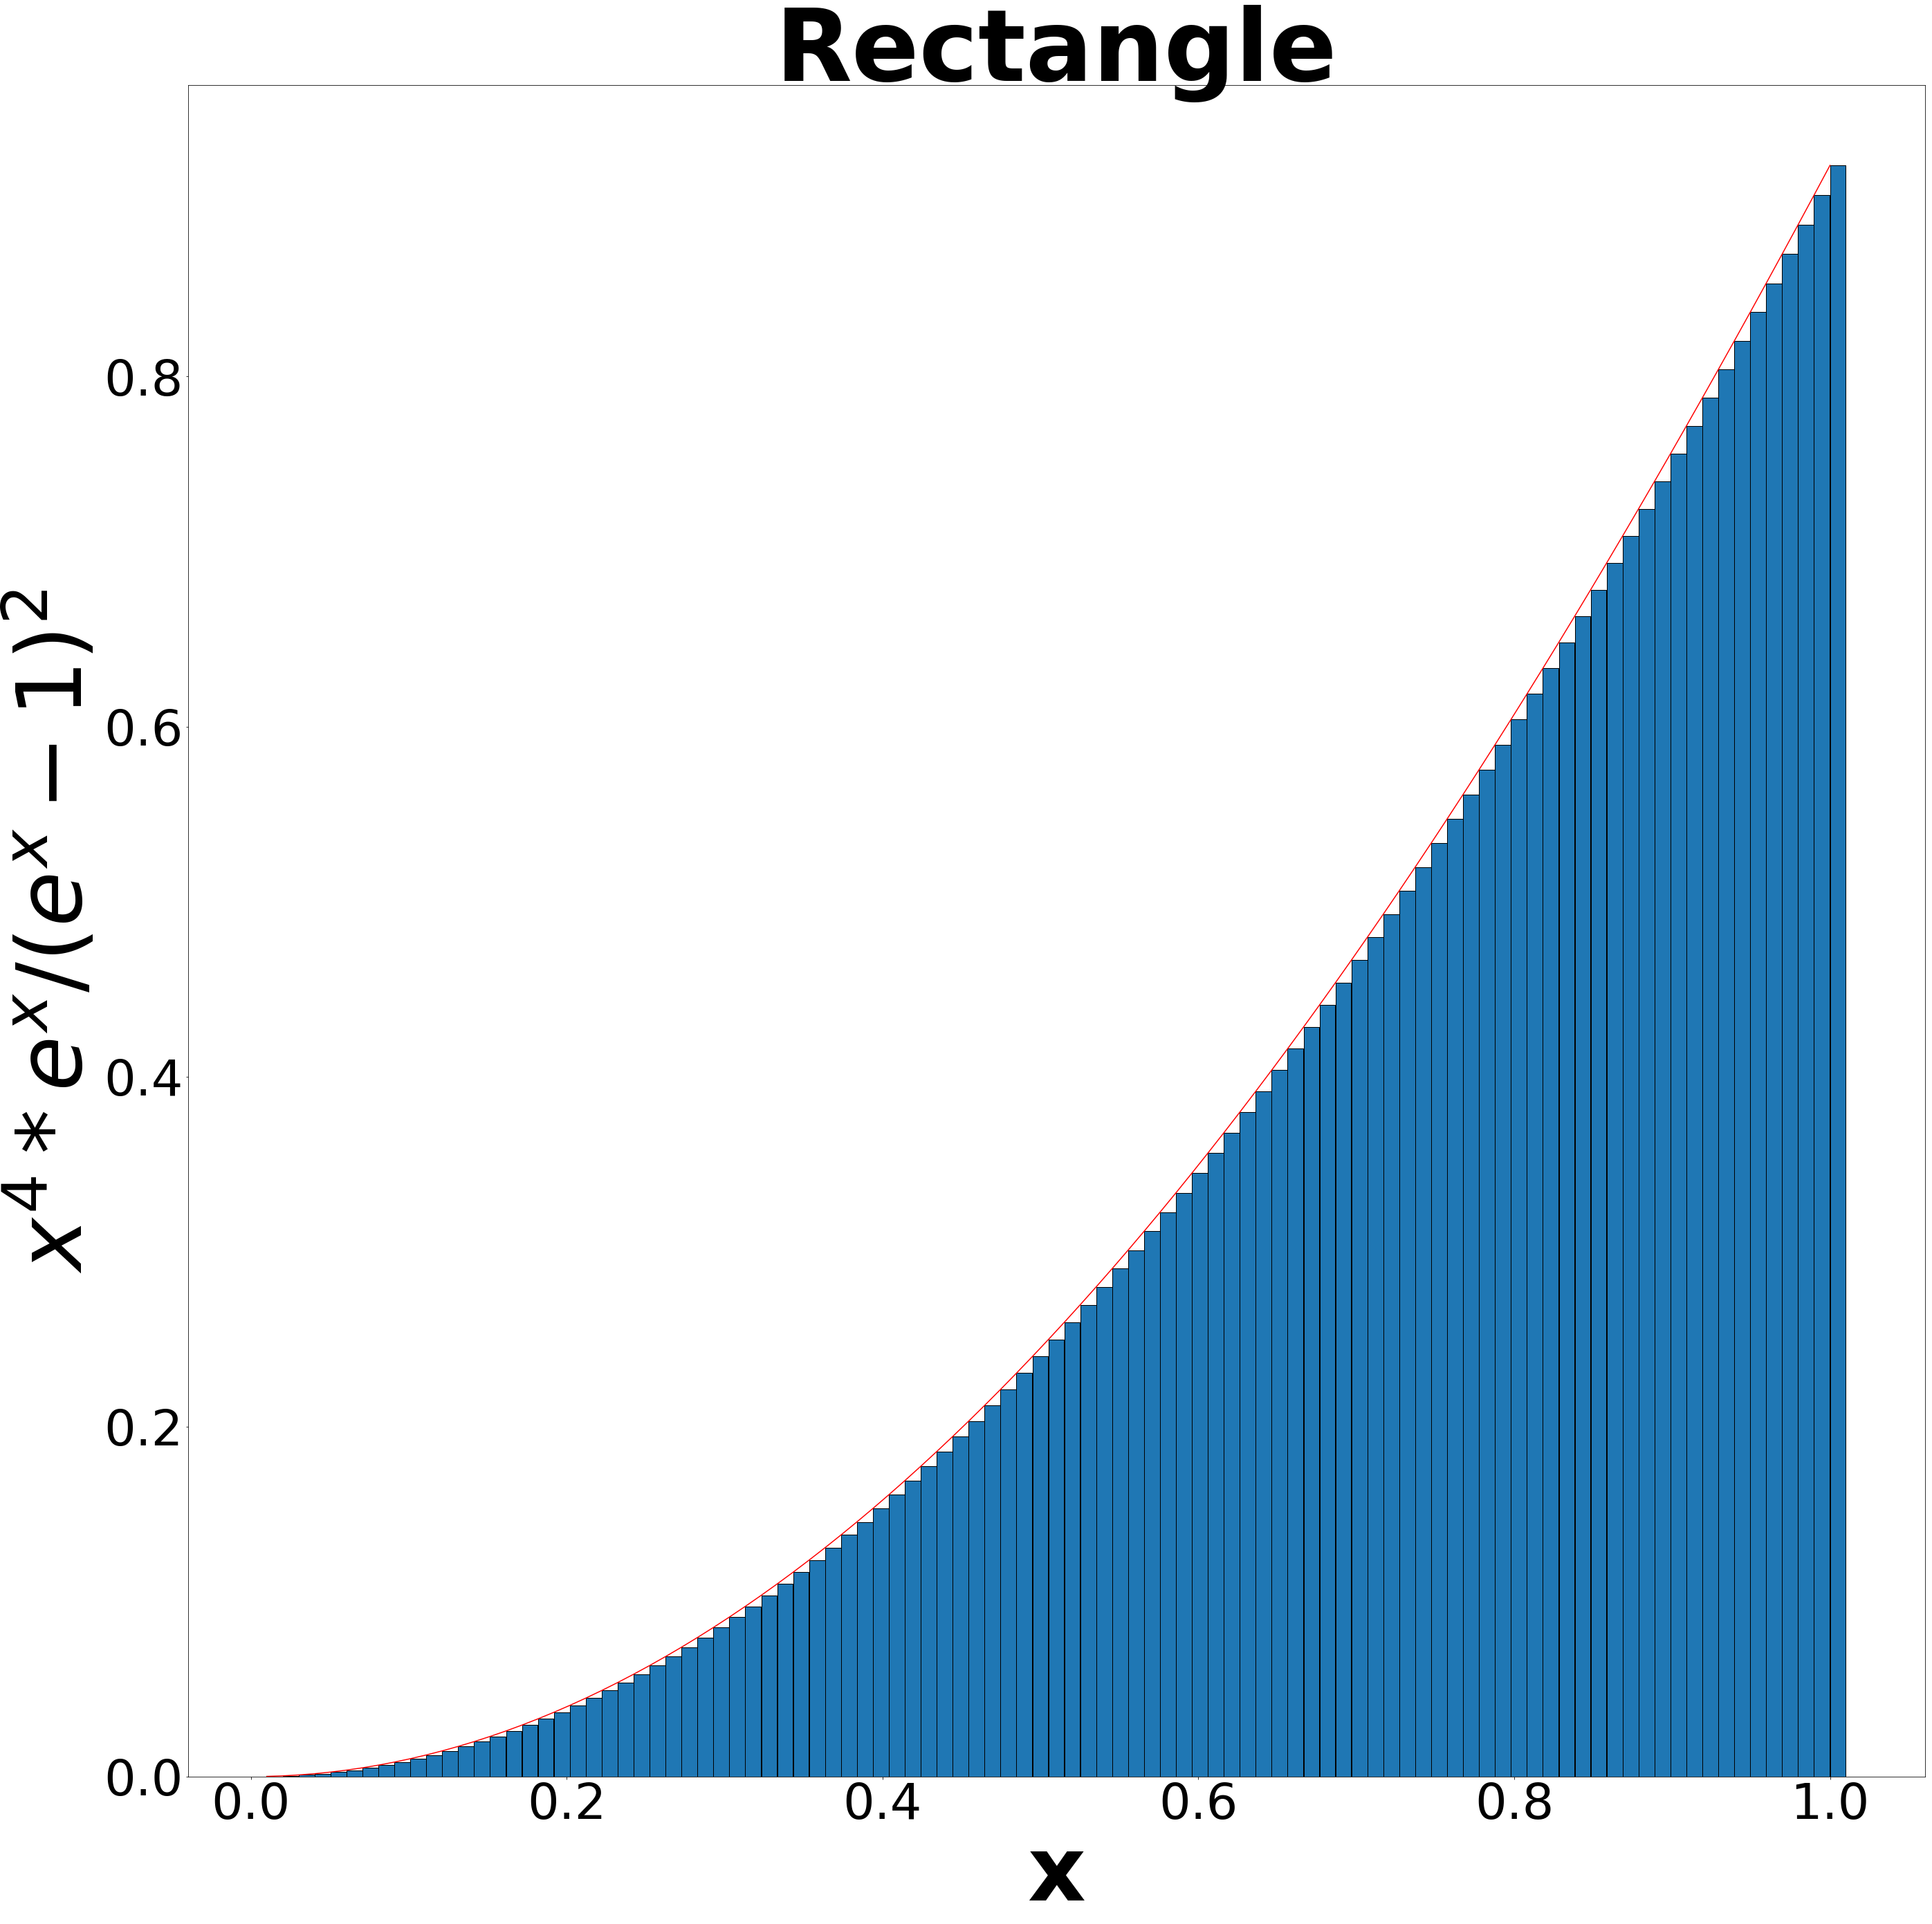

The Sum of the area is:  nan


nan

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, exp
import matplotlib.image as image
#np.seterr(divide='ignore', invalid='ignore')

def Rectangle(start, end, parts, plot=1):
    """
    Rectrangle sum rule
    
    """
    #define the function
    #f = lambda x: x * x  
    f = lambda x: (x**4)*exp(x) / (exp(x) - 1)**2
 
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts)
    resultsy = f(resultsx)
    
    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = resultsy[i] * deltax    

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = (x**4)*exp(x) / (exp(x) - 1)**2
        
        image.rcParams["figure.figsize"] = [45, 45] 
        plt.plot(x, y, 'r')
        
        plt.title("Rectangle", size=144, weight=1000)
        plt.xlabel('x', size=130, weight=1000)
        plt.xticks(size=72, weight=500)
        plt.ylabel('$x^4*e^x / (e^x - 1)^2$', size=130, weight=1000)
        plt.yticks(size=72, weight=500)
        
        #plt.xlim([start,end])
        plt.bar(resultsx+(deltax/2), resultsy, deltax, edgecolor ='black')
        #plt.bar(resultsx, resultsy, deltax, edgecolor ='black')
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

Rectangle(0,1,100)

The Sum of the area is:  0.04256047688198007


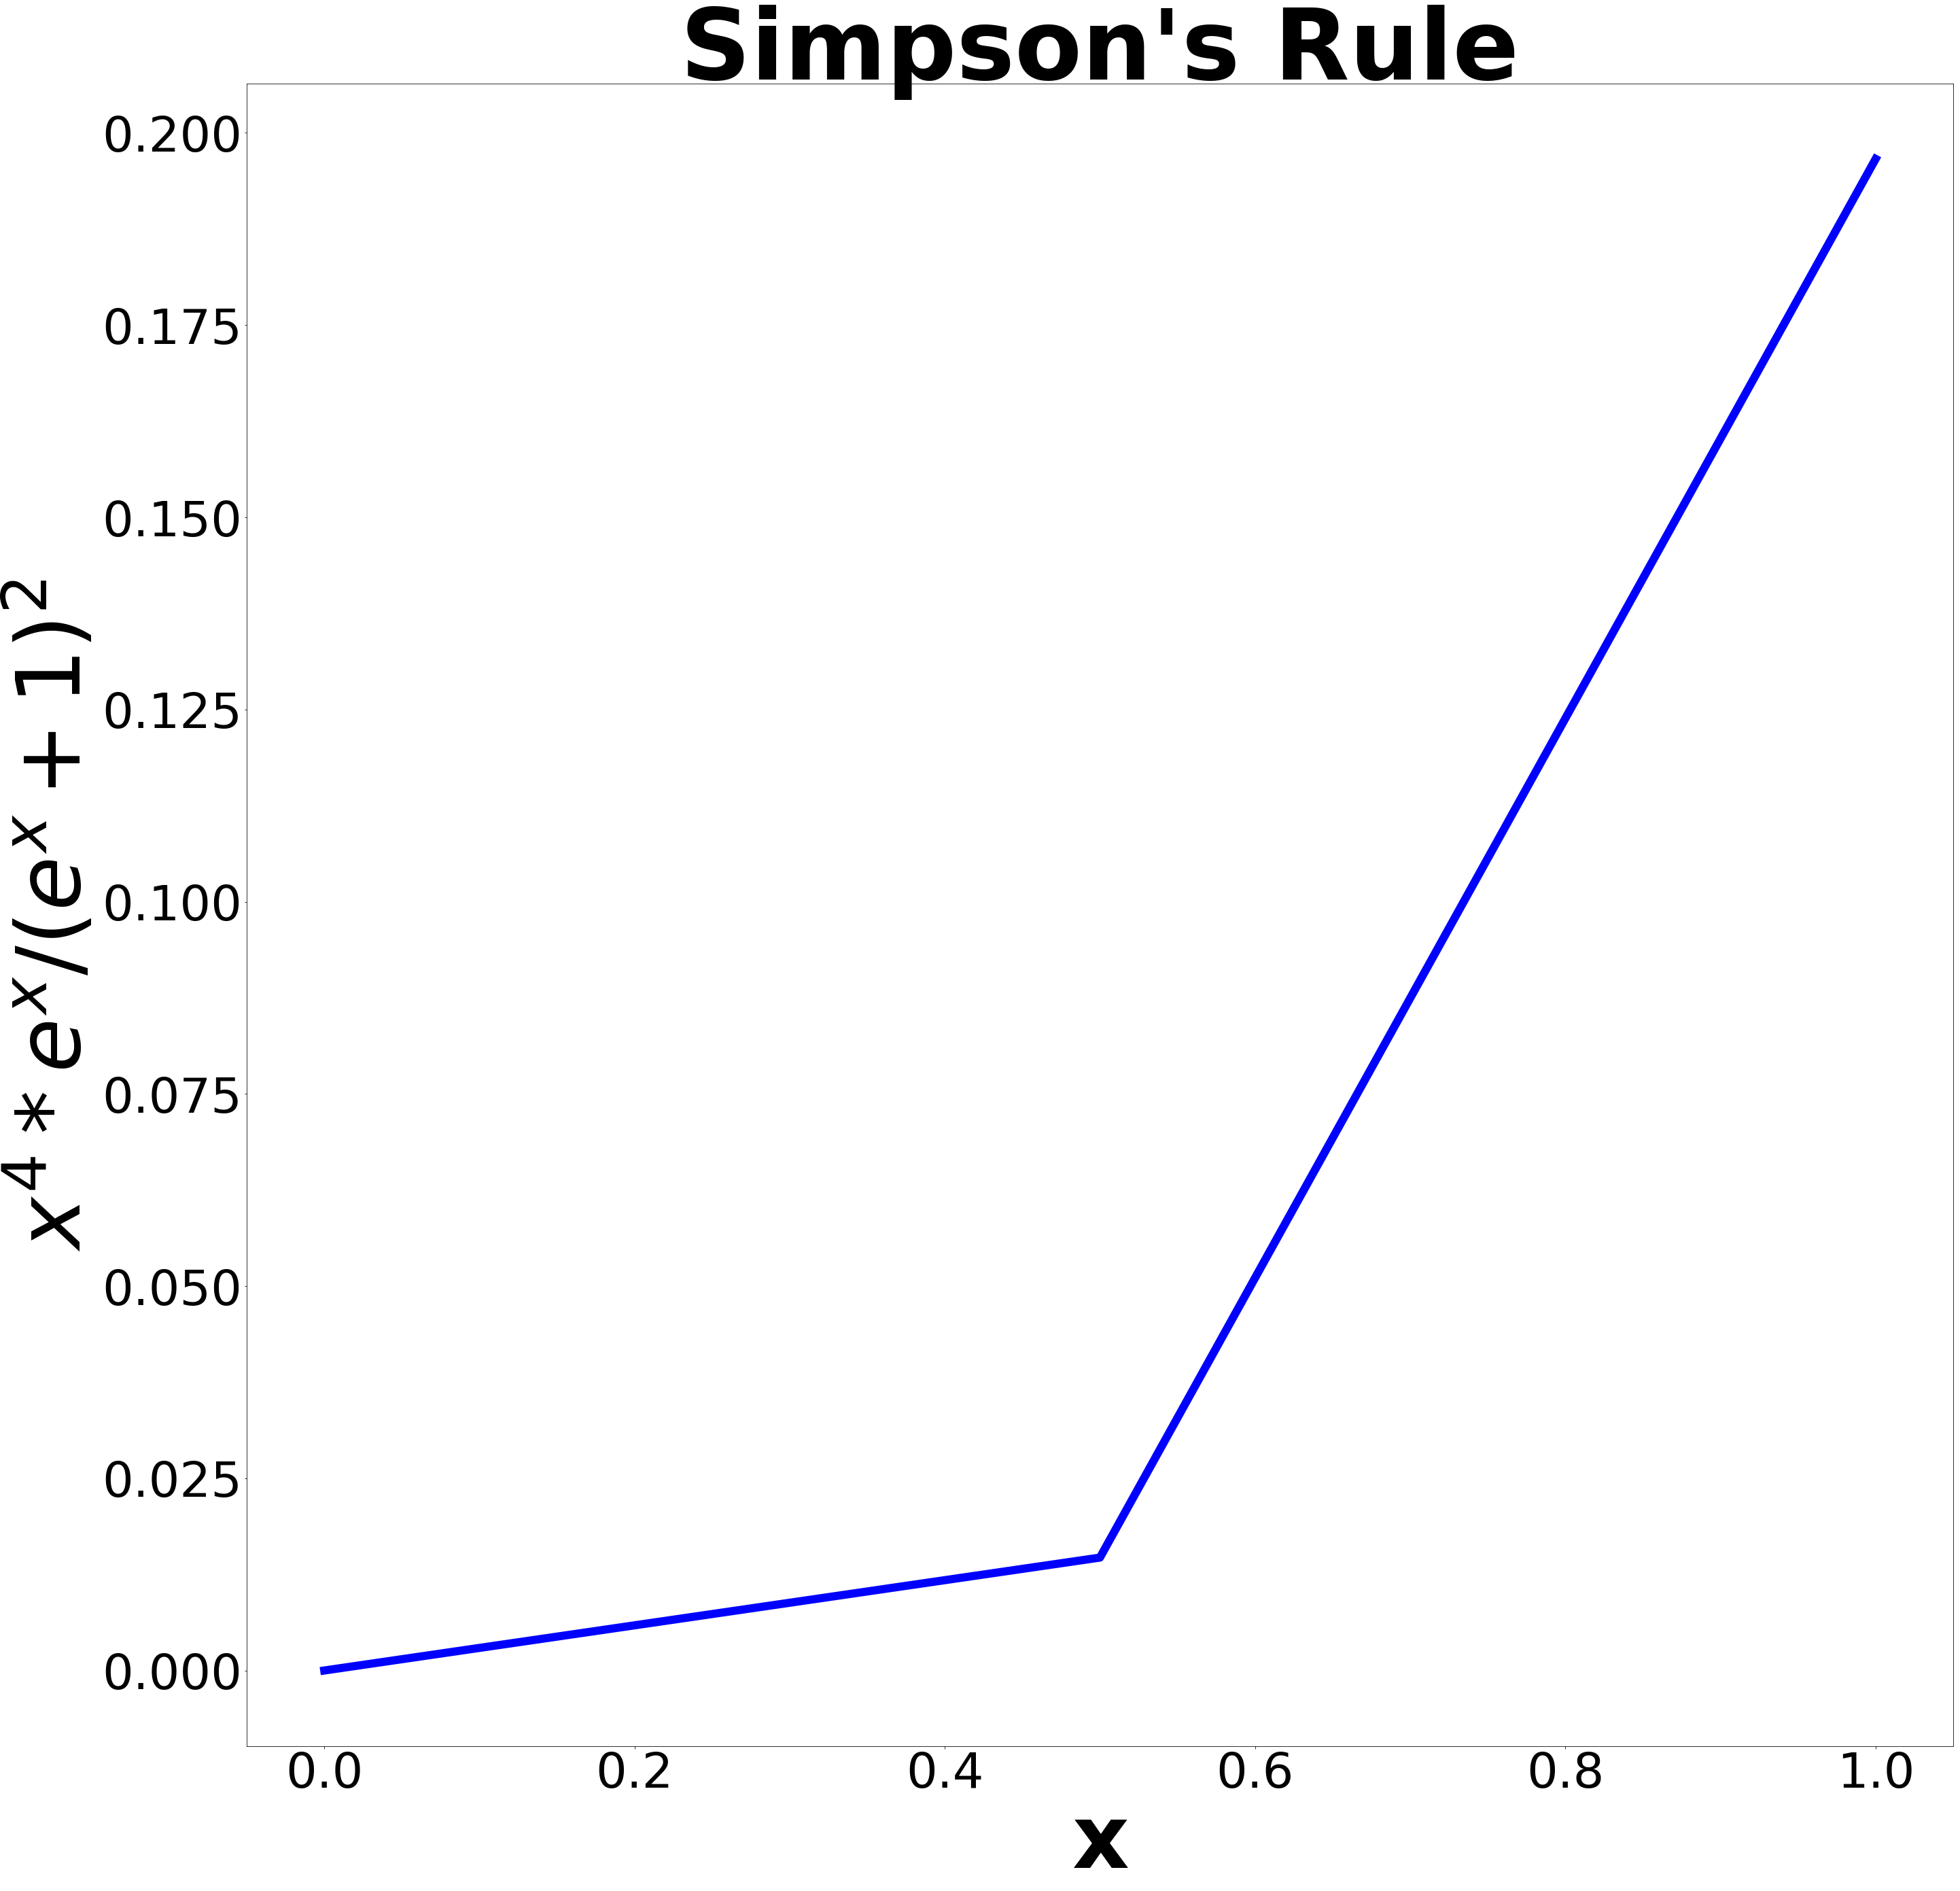

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image 
from numpy import pi, cos, exp

def calc_area_under_curve_based_on_simpsons_rule(upper_limit, lower_limit, a_function):
    f = a_function
    b = upper_limit
    a = lower_limit
    m = (b - a) / 2
    area_from_simpsons_rule = ((b - a) / 6) * (f(a) + 4*f(m) + f(b))
    print("The Sum of the area is: ", area_from_simpsons_rule)
    x_list = [a, m, b]
    y_list = [f(a), f(m), f(b)]
    image.rcParams["figure.figsize"] = [45, 45] 
    plt.plot(x_list, y_list, 'b', linewidth=12)
    
    plt.title("Simpson's Rule", size=144, weight=1000)
    plt.xlabel('x', size=130, weight=1000)
    plt.xticks(size=72, weight=500)
    plt.ylabel('$x^4*e^x / (e^x + 1)^2$', size=130, weight=1000)
    plt.yticks(size=72, weight=500)
    
    plt.show()

calc_area_under_curve_based_on_simpsons_rule(1, 0, lambda x: (x**4)*exp(x) / (exp(x) + 1)**2)
#calc_area_under_curve_based_on_simpsons_rule(1, 0, lambda x: (x**4)*exp(x) / (exp(x) - 1)**2)

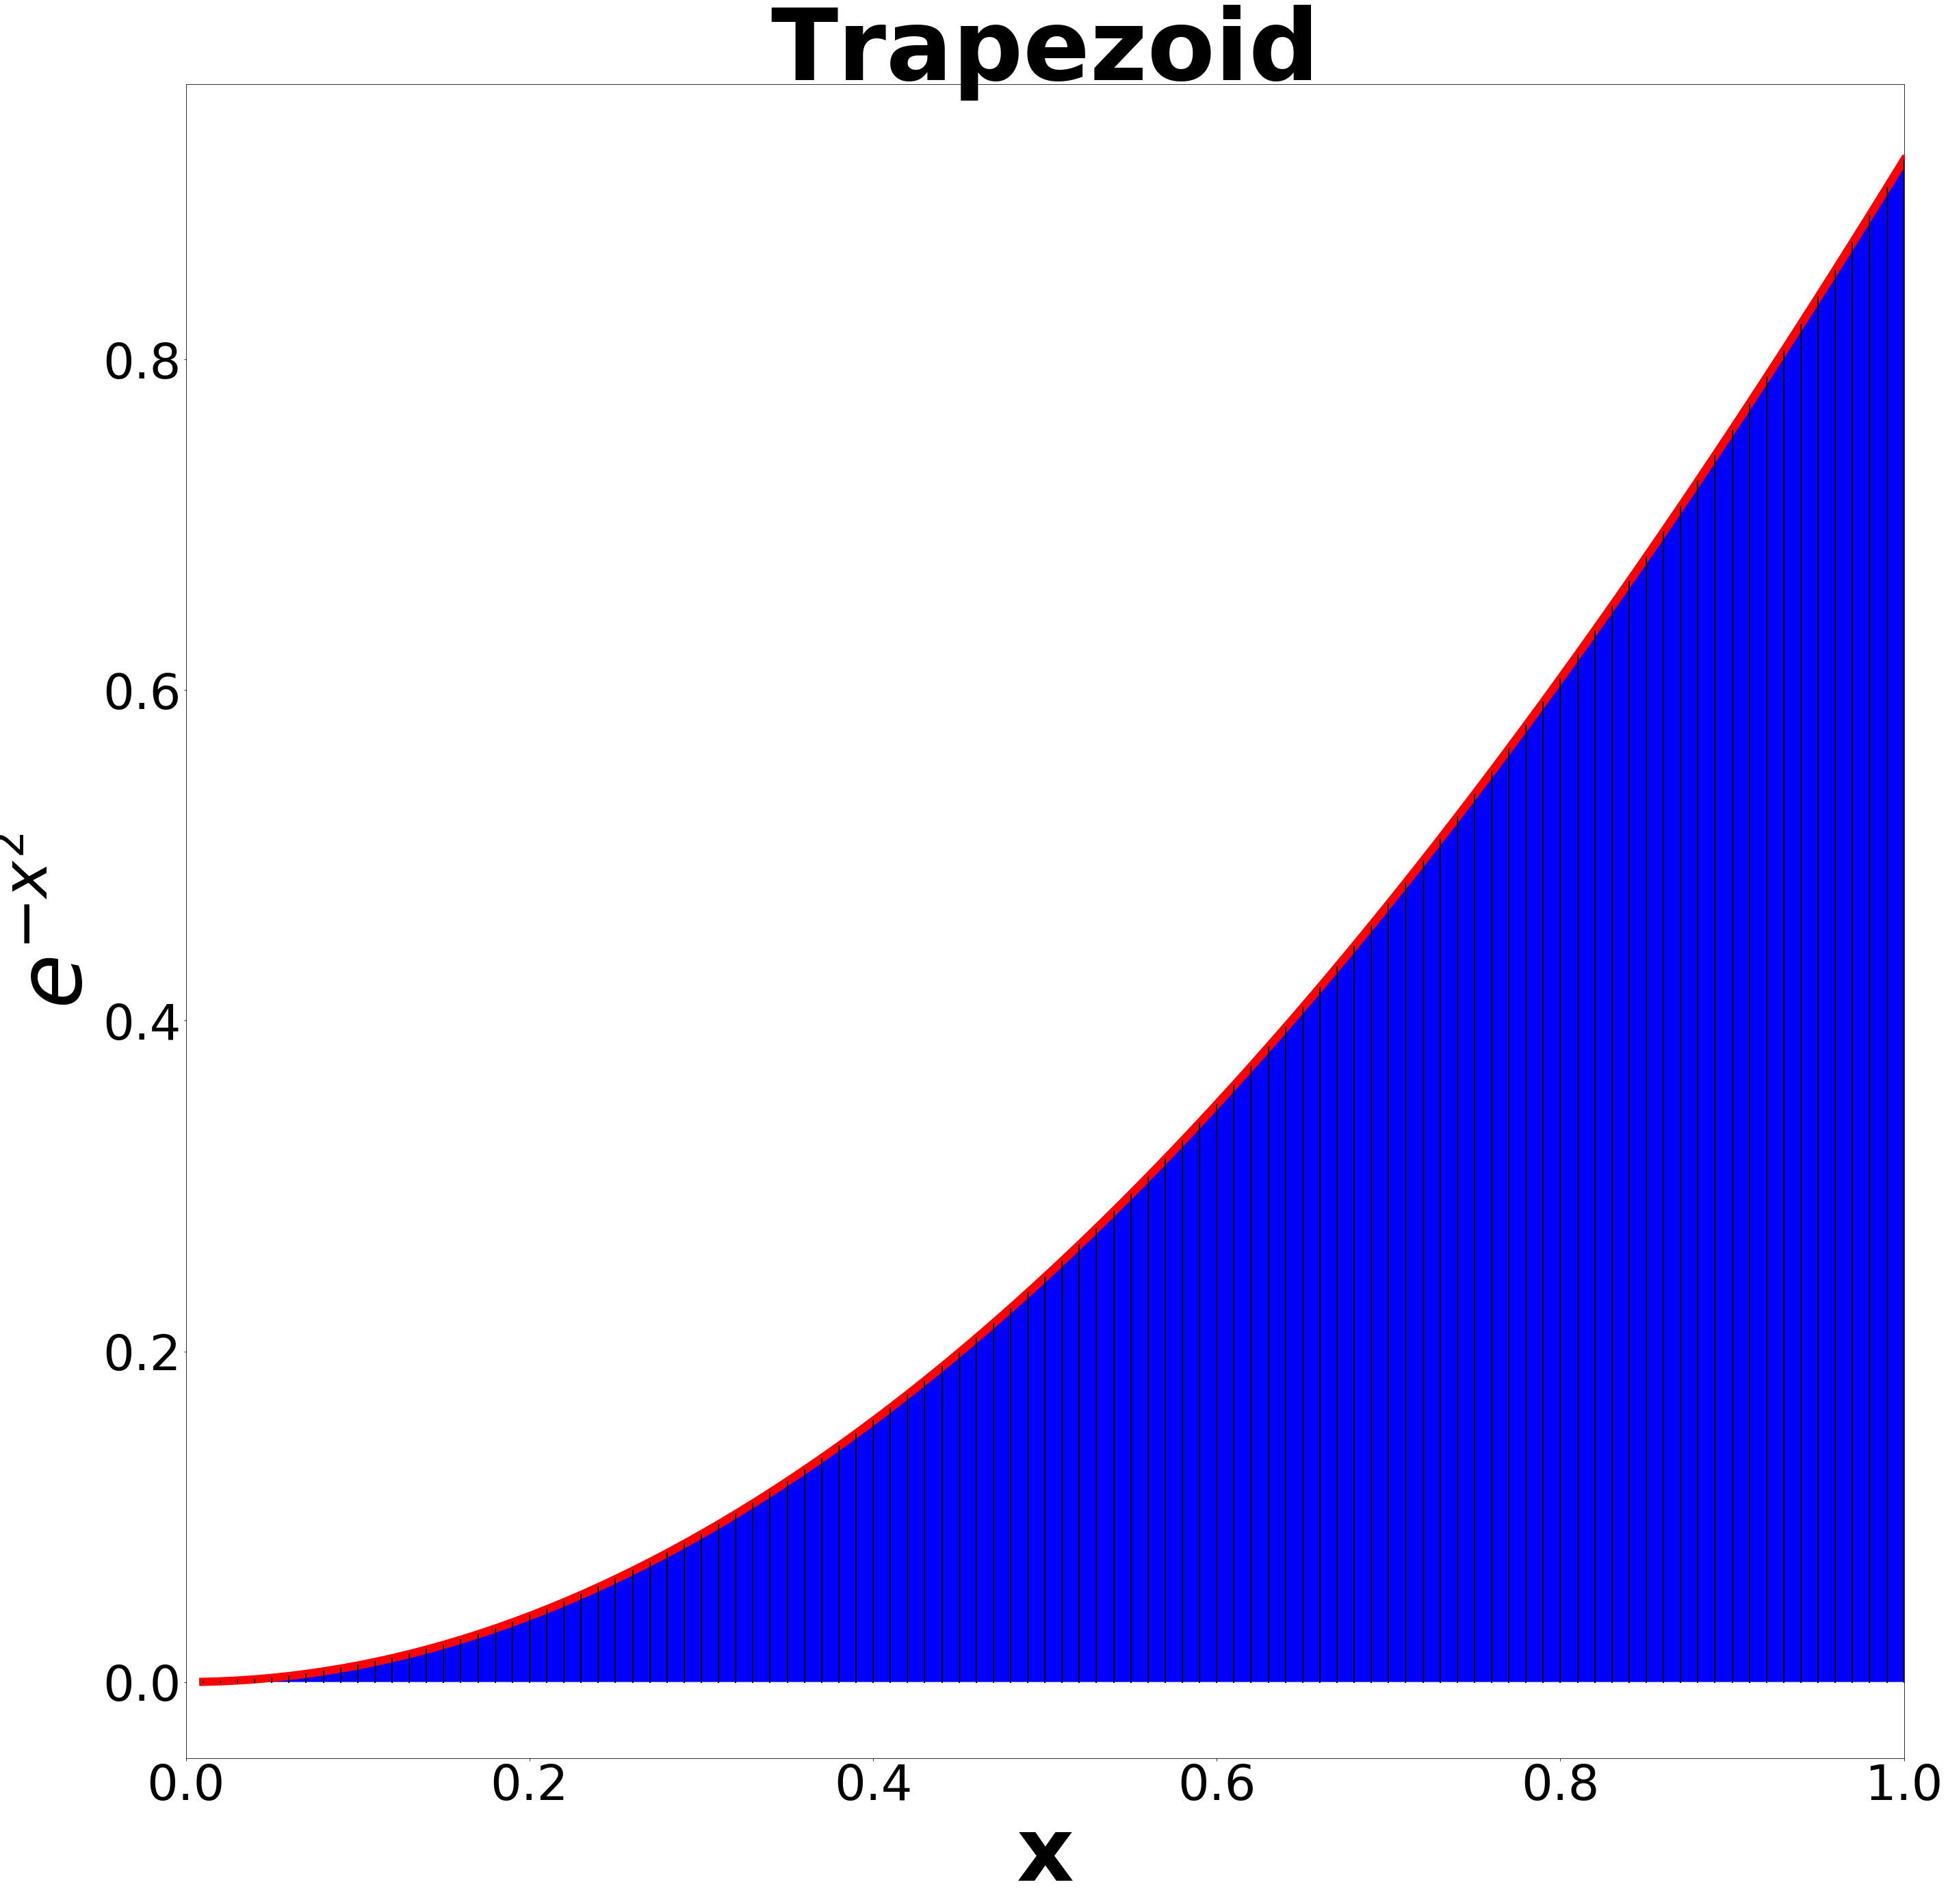

The Sum of the area is:  nan


nan

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def Trapezoid(start, end, parts, plot=1):
    """
    Trapezoid sum rule
    
    """
    #define the function
    #f = lambda x: x * x
    f = lambda x: (x**4)*exp(x) / (exp(x) - 1)**2
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
        area[i] = resultsy[i] * deltax
        #area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

    # By default, we also output the plot.
    if plot==1:
        x = np.linspace(start,end,100)
        y = f(x)        
        plt.plot(x, y, 'r', linewidth=12)
        plt.xlim([start,end])
        
        plt.title("Trapezoid", size=144, weight=1000)
        plt.xlabel('x', size=130, weight=1000)
        plt.xticks(size=72, weight=500)
        plt.ylabel('$e^{-x^2}$', size=130, weight=1000)
        plt.yticks(size=72, weight=500)
        
        y2 = np.array([0,0])
        for i in range(parts):
            x0 = resultsx[i:i+2]
            y1 = resultsy[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [resultsx[i+1], resultsx[i+1]], [0, resultsy[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0)        
        
        plt.show()
        print("The Sum of the area is: ", sum(area))
    
    return sum(area)

Trapezoid(0,1,100)

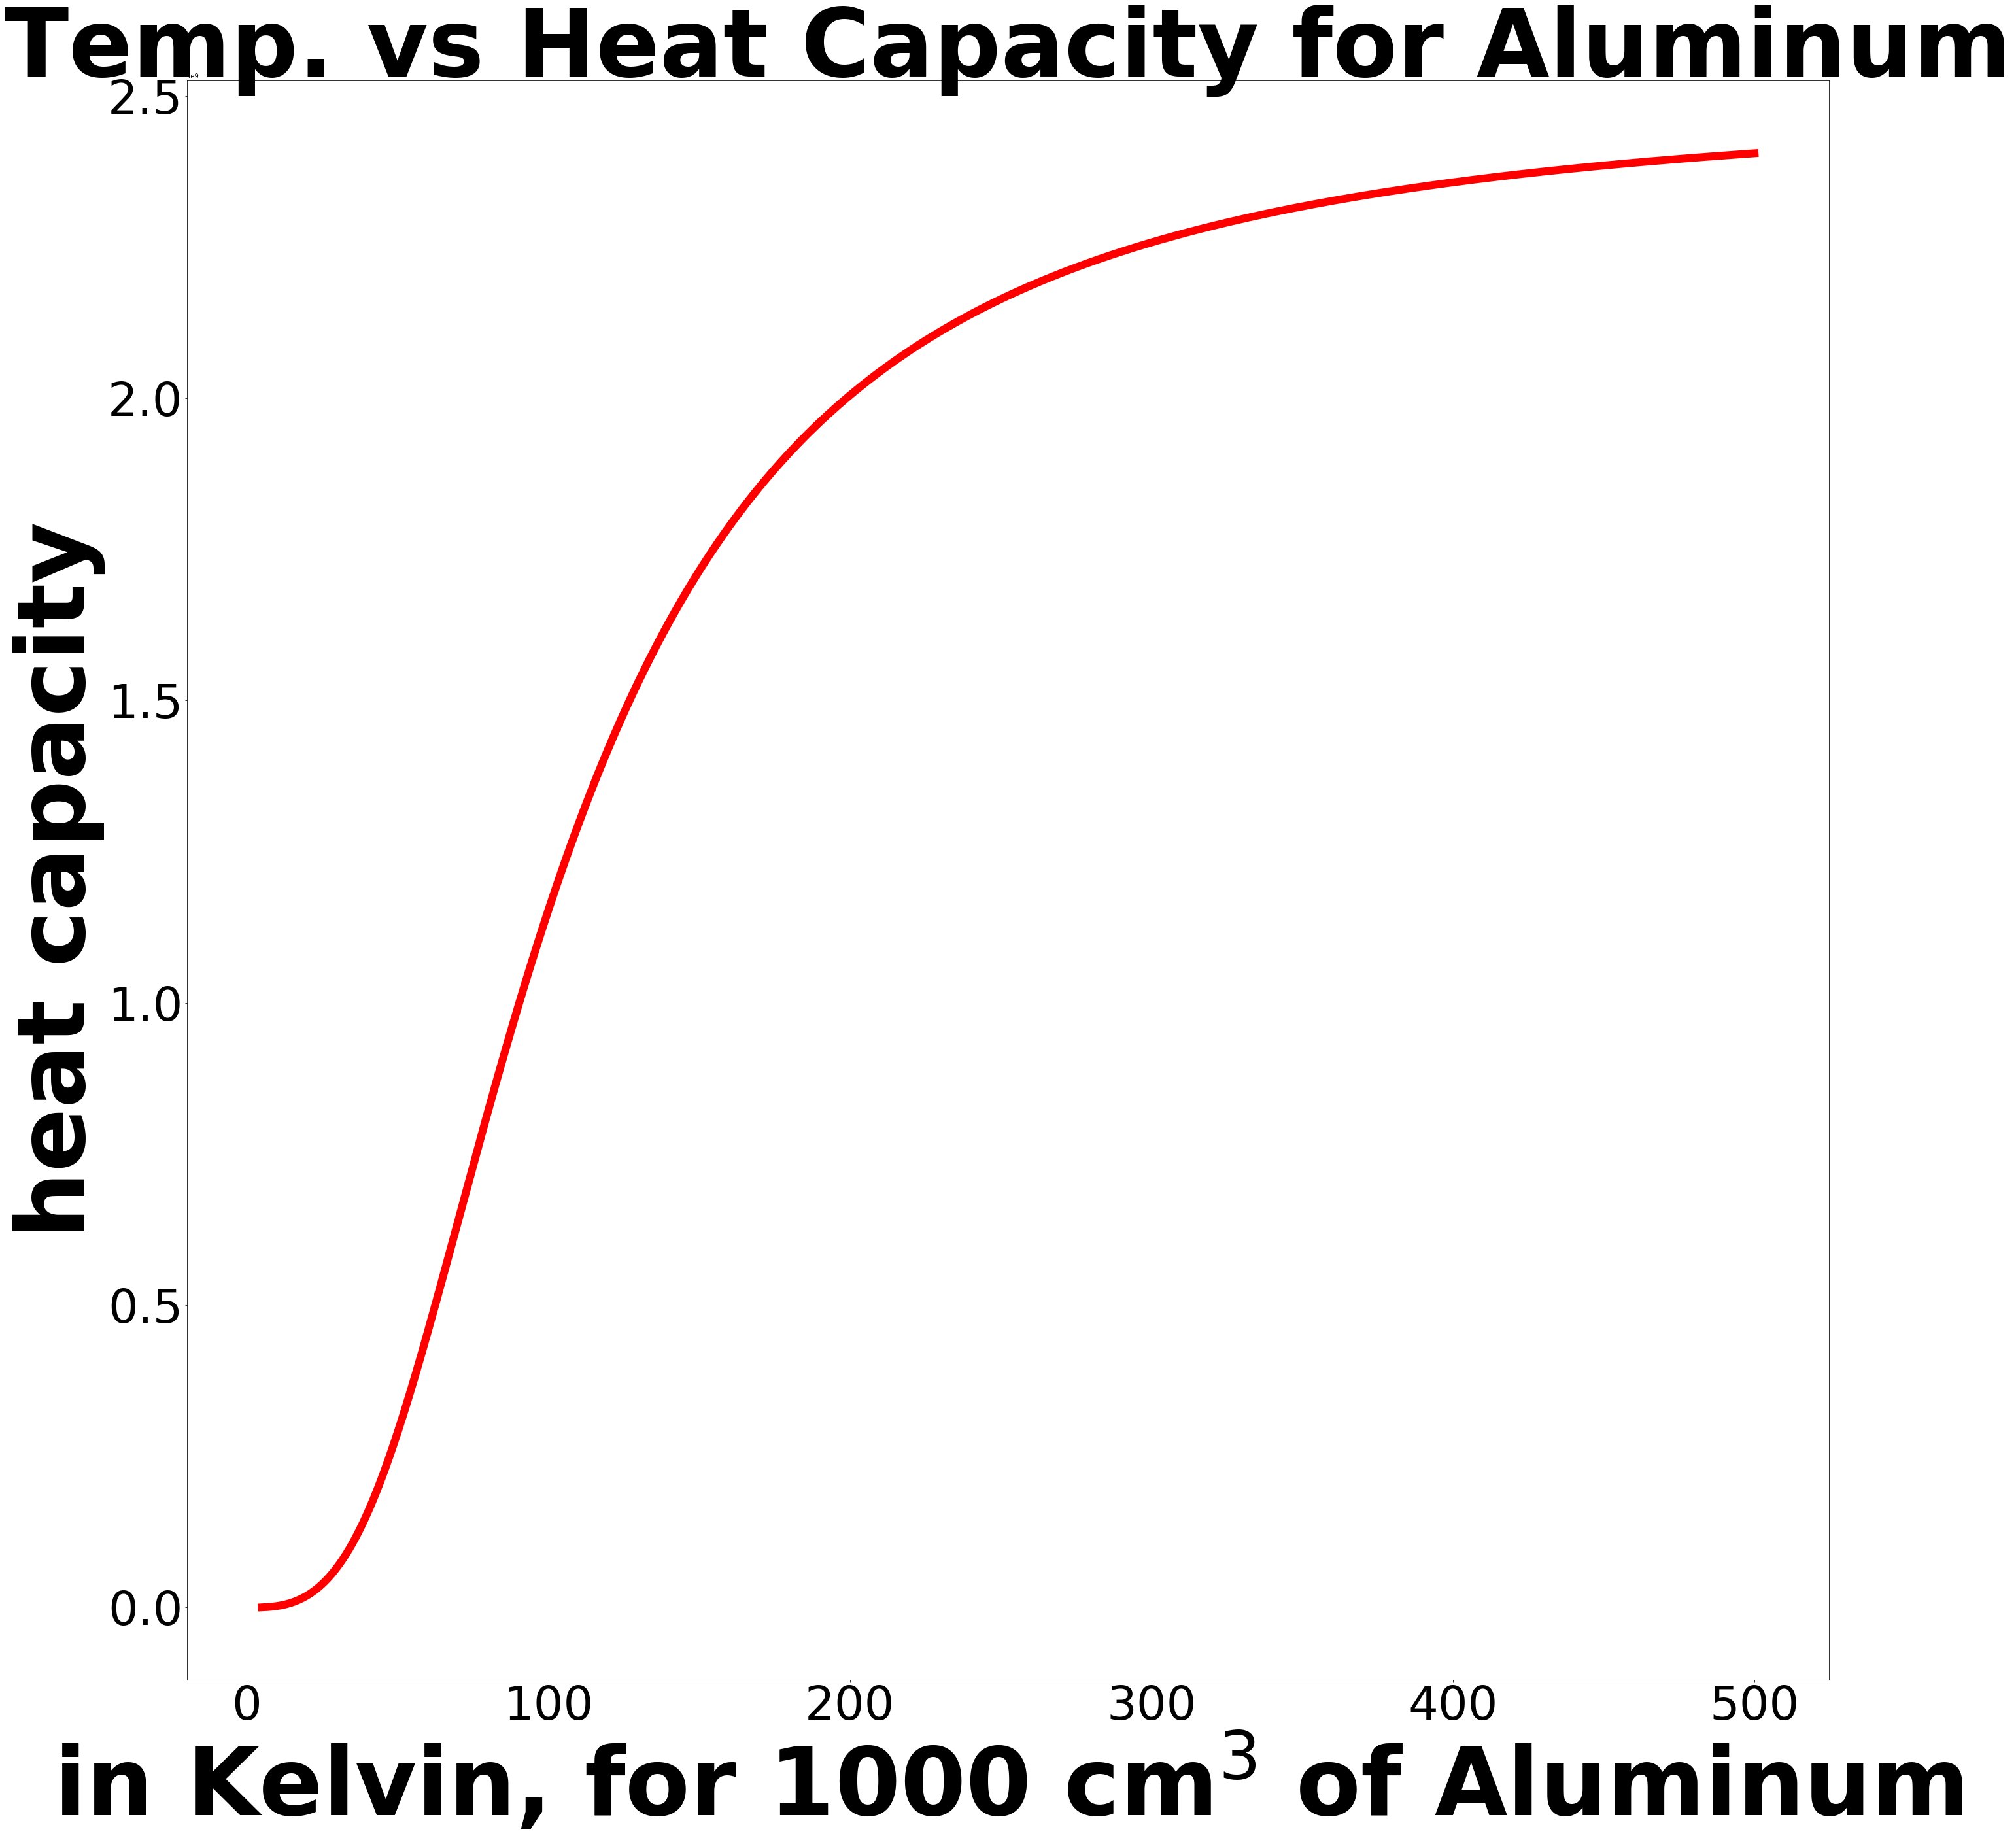

In [151]:
from scipy import integrate

def calc_heat_capacity_of_solid(volume_of_solid, density_of_atoms, Boltzmann_constant, Debye_temperature, solid_temperature, a_function):
  V = volume_of_solid
  rho = density_of_atoms
  k_sub_B = Boltzmann_constant
  theta_sub_D = Debye_temperature
  T = solid_temperature
  f = a_function
  
  upper_limit = theta_sub_D / T
  a_tuple = integrate.quad(f, 0, upper_limit)
  integral_under_curve = a_tuple[0]
  return 9 * V * rho * k_sub_B * ( T / theta_sub_D )**3 * integral_under_curve

calc_heat_capacity_of_solid(volume_of_solid = 1000, density_of_atoms = 6.022 * 10**28, Boltzmann_constant = 1.38064852 * 10**-23, Debye_temperature = 428, solid_temperature = 428, a_function = lambda x: (x**4)*exp(x) / (exp(x) - 1)**2)
x_list = []
y_list = []
list_of_solid_temps = x_list
list_of_heat_capacities = y_list

for solid_temperature in range(5, 501):
    x_list.append(solid_temperature)
    C_sub_V = calc_heat_capacity_of_solid(volume_of_solid = 1000, density_of_atoms = 6.022 * 10**28, Boltzmann_constant = 1.38064852 * 10**-23, Debye_temperature = 428, solid_temperature = solid_temperature, a_function = lambda x: (x**4)*exp(x) / (exp(x) - 1)**2)
    y_list.append(C_sub_V)

import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as image


image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(list_of_solid_temps, list_of_heat_capacities, 'r', linewidth=12)
plt.title('Temp. vs Heat Capacity for Aluminum', size=144, weight=1000)
plt.xlabel('in Kelvin, for 1000 cm$^3$ of Aluminum', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('heat capacity', size=144, weight=1000)
plt.yticks(size=72, weight=500)

plt.show()

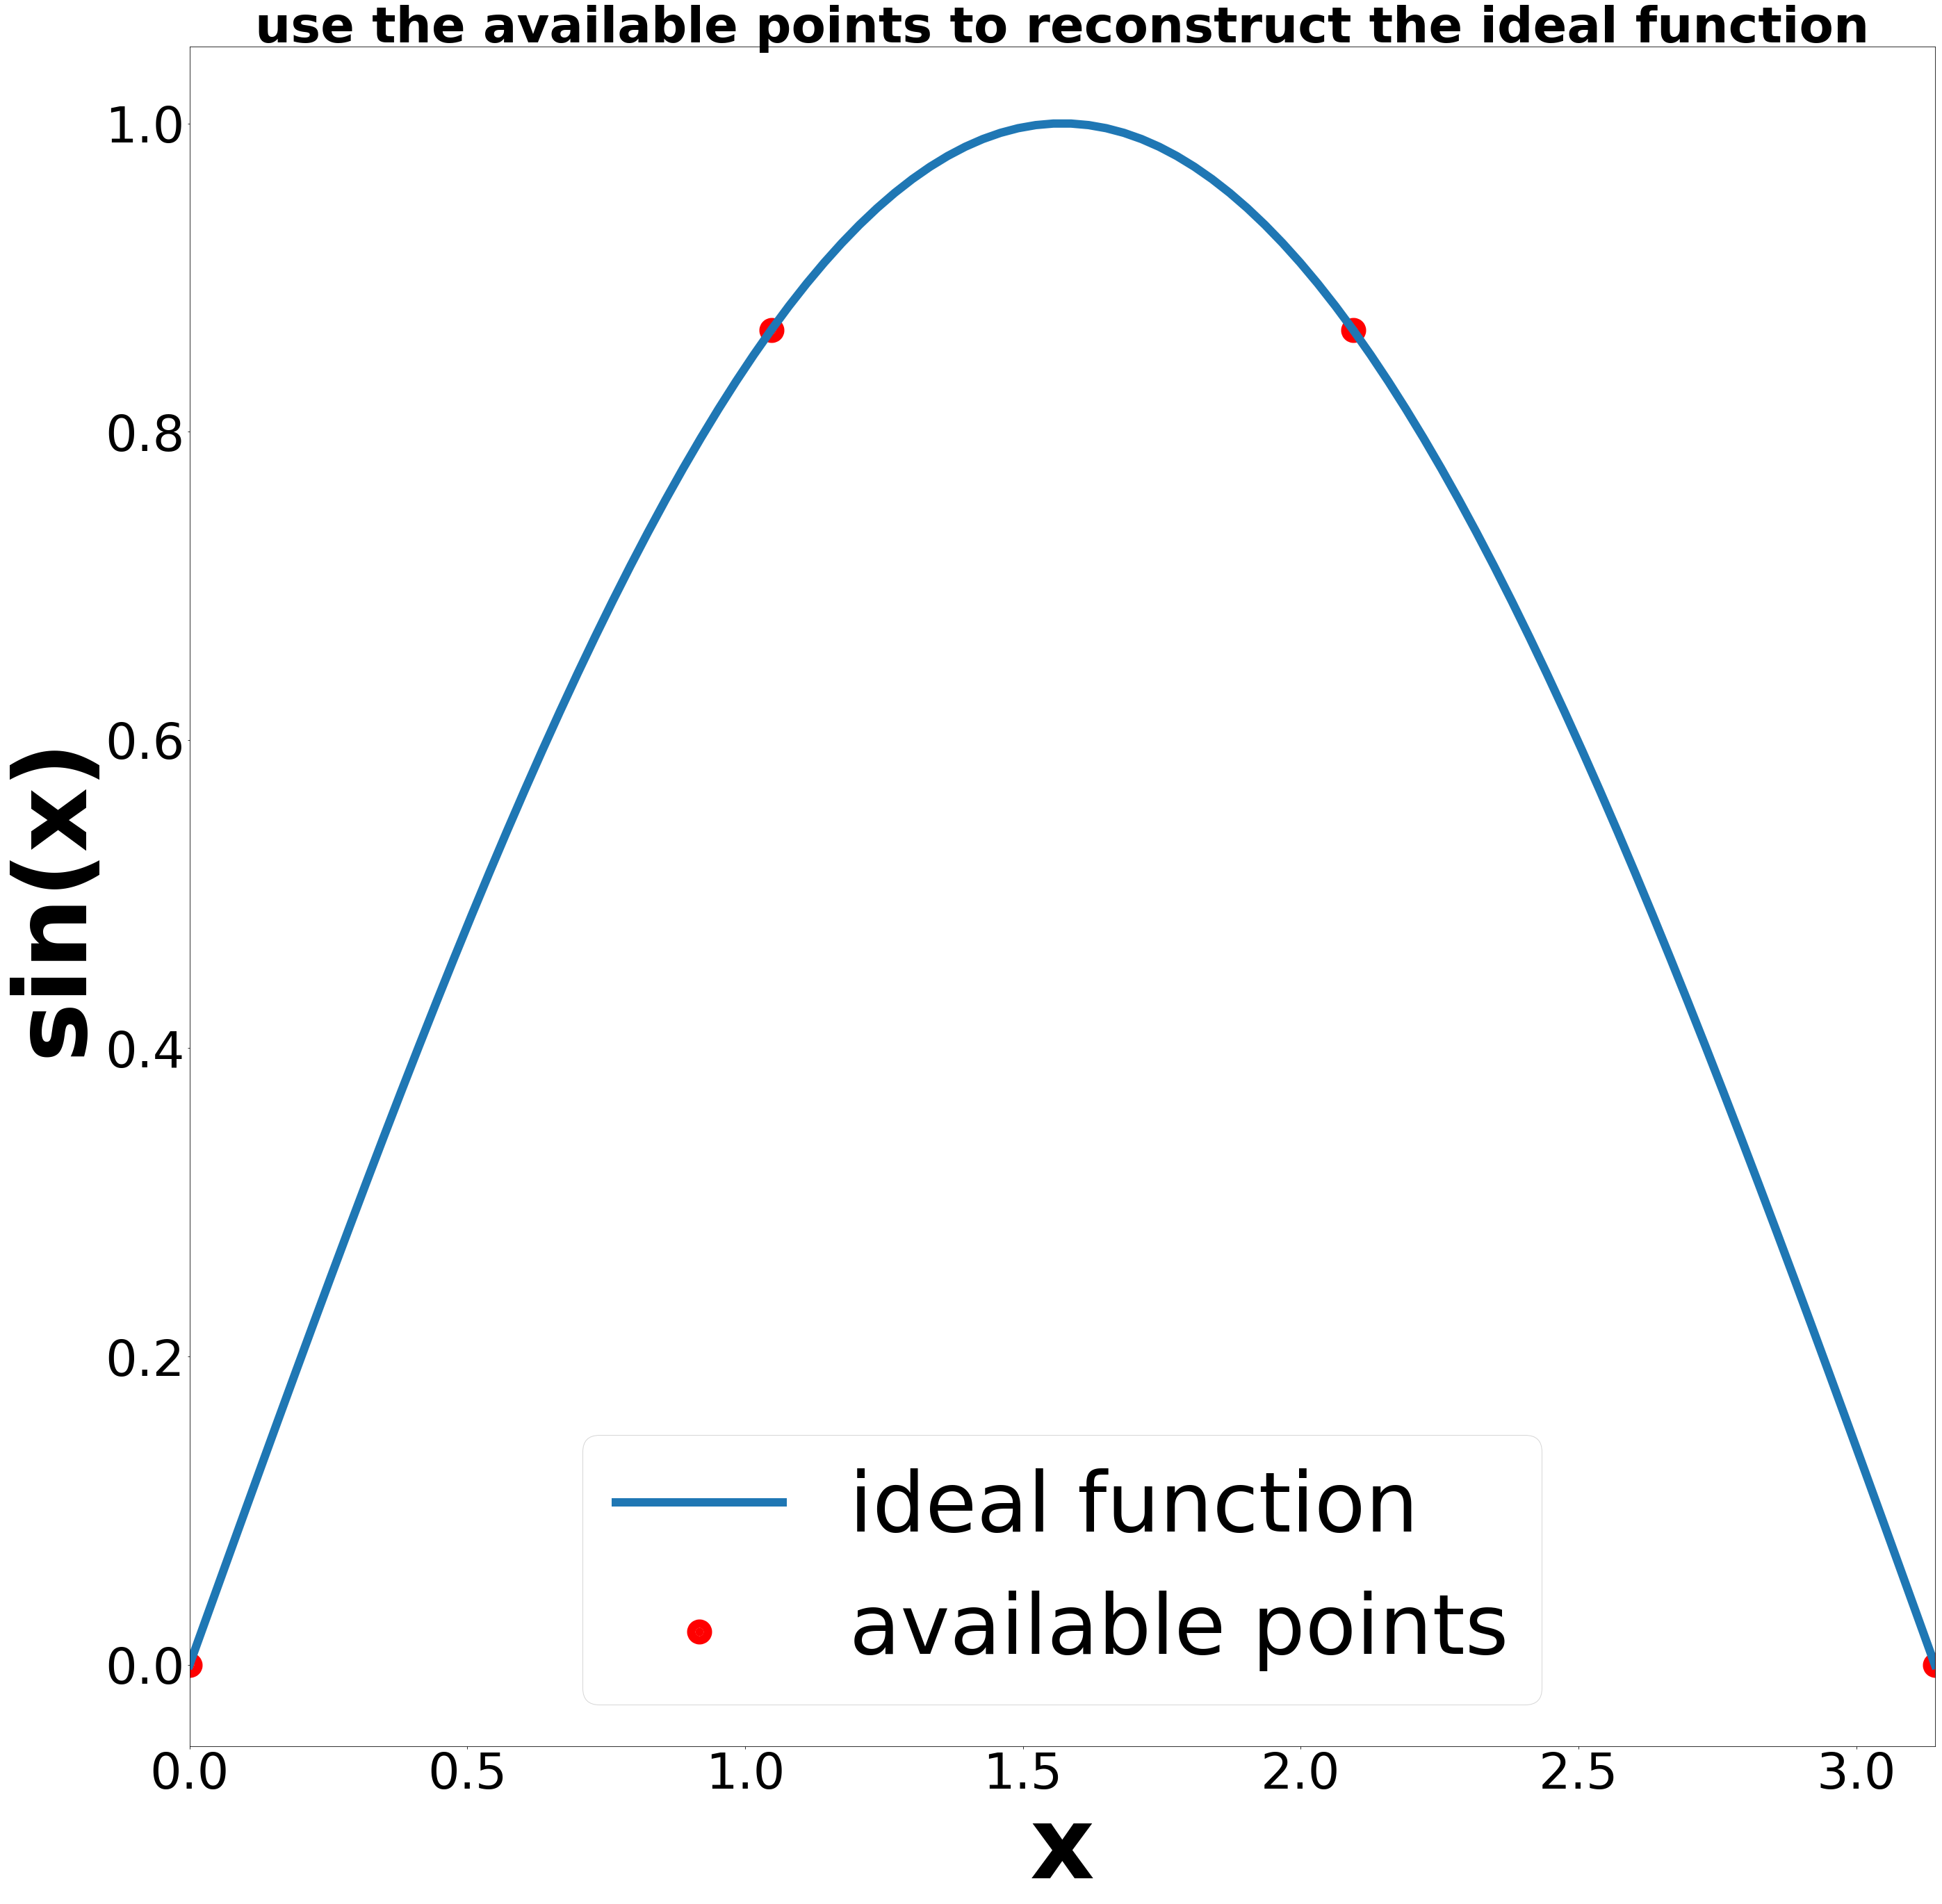

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin
import matplotlib.image as image

f = lambda x: sin(x) 
x_min, x_max = 0, pi
npt0 = 100
npt1 = 4

x0 = np.linspace(x_min, x_max, npt0)
x1 = np.linspace(x_min, x_max, npt1) 

image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(x0, f(x0), label='ideal function', linewidth=12)
plt.scatter(x1,f(x1), color='r', label='available points', linewidth=24, s=144)

plt.legend(fontsize=120)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('sin(x)', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([0, pi])
plt.title('use the available points to reconstruct the ideal function', size=72, weight=1000)
plt.show()

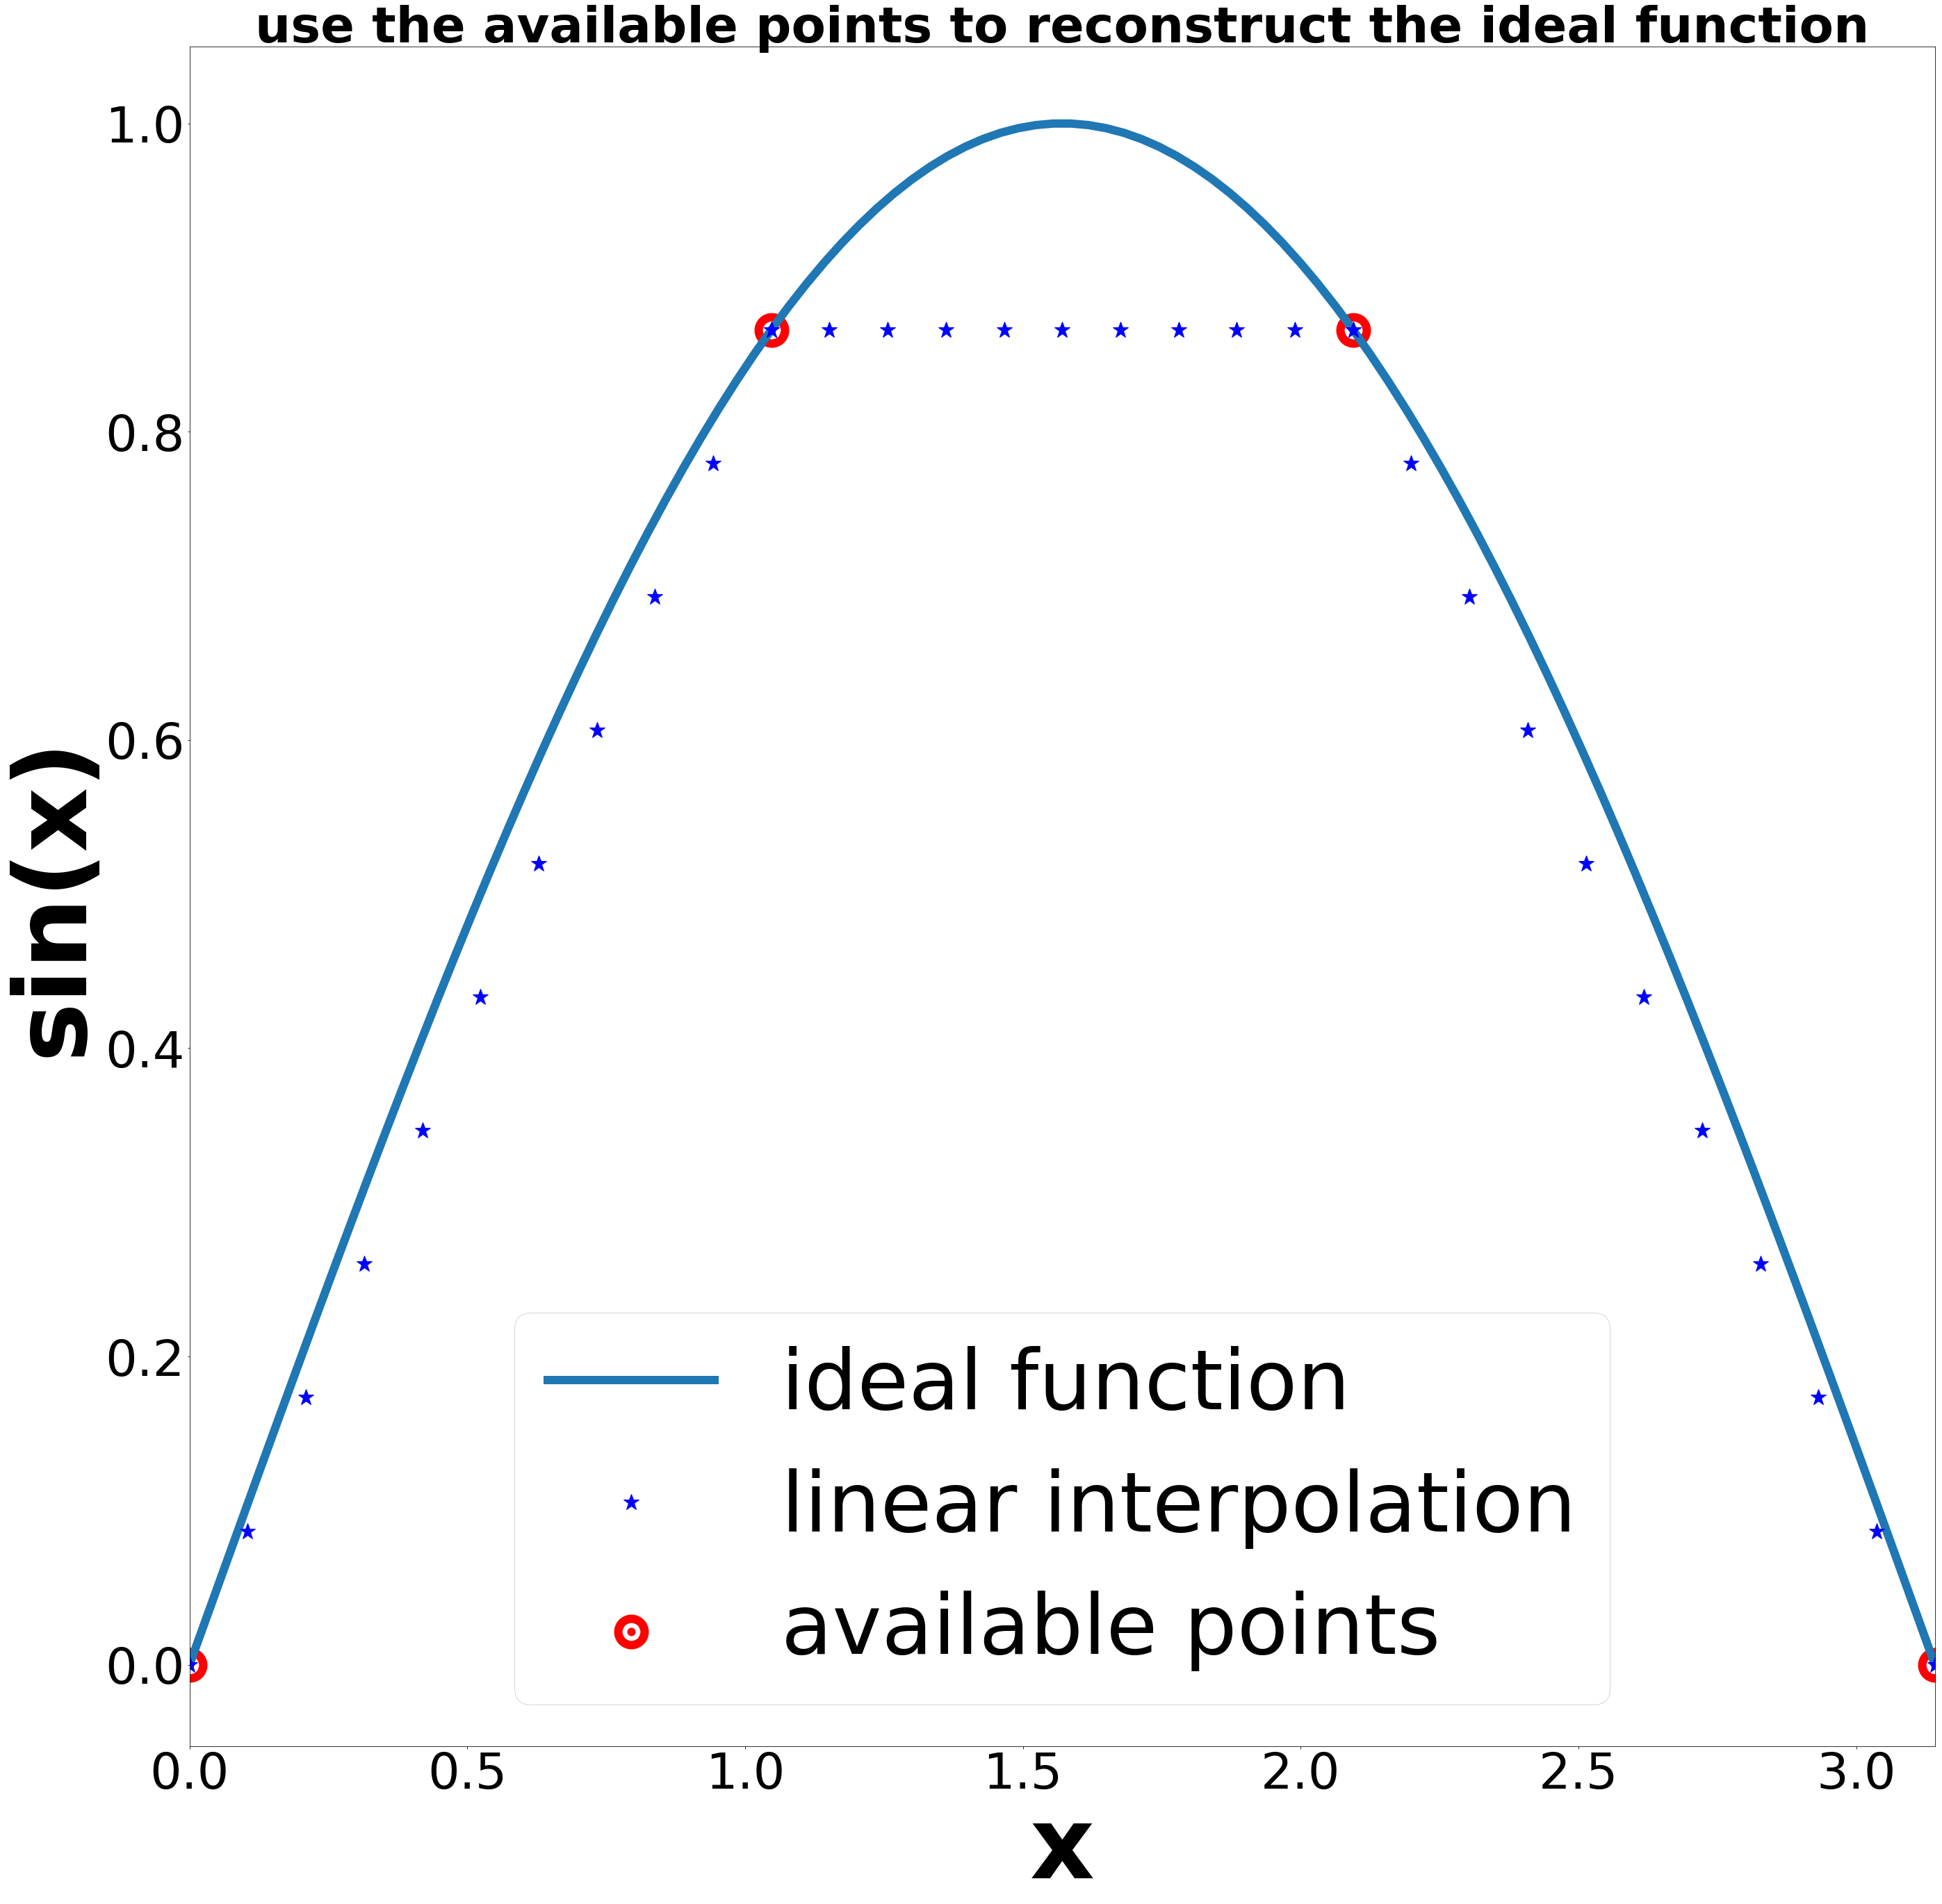

In [149]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points

x2 = []
y2 = []

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + slope*delta*j)
#---------To interpolate based on the available points


#plot all points
image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(x0,f(x0),label='ideal function', linewidth=12)
plt.scatter(x1,f(x1), color='r', label='available points', linewidth=38, s=144)
plt.plot(x2,y2, '*b', label='linear interpolation', linewidth=12, markersize=24)

plt.legend(fontsize=120)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('sin(x)', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([0, pi])
plt.title('use the available points to reconstruct the ideal function', size=72, weight=1000)
plt.show()

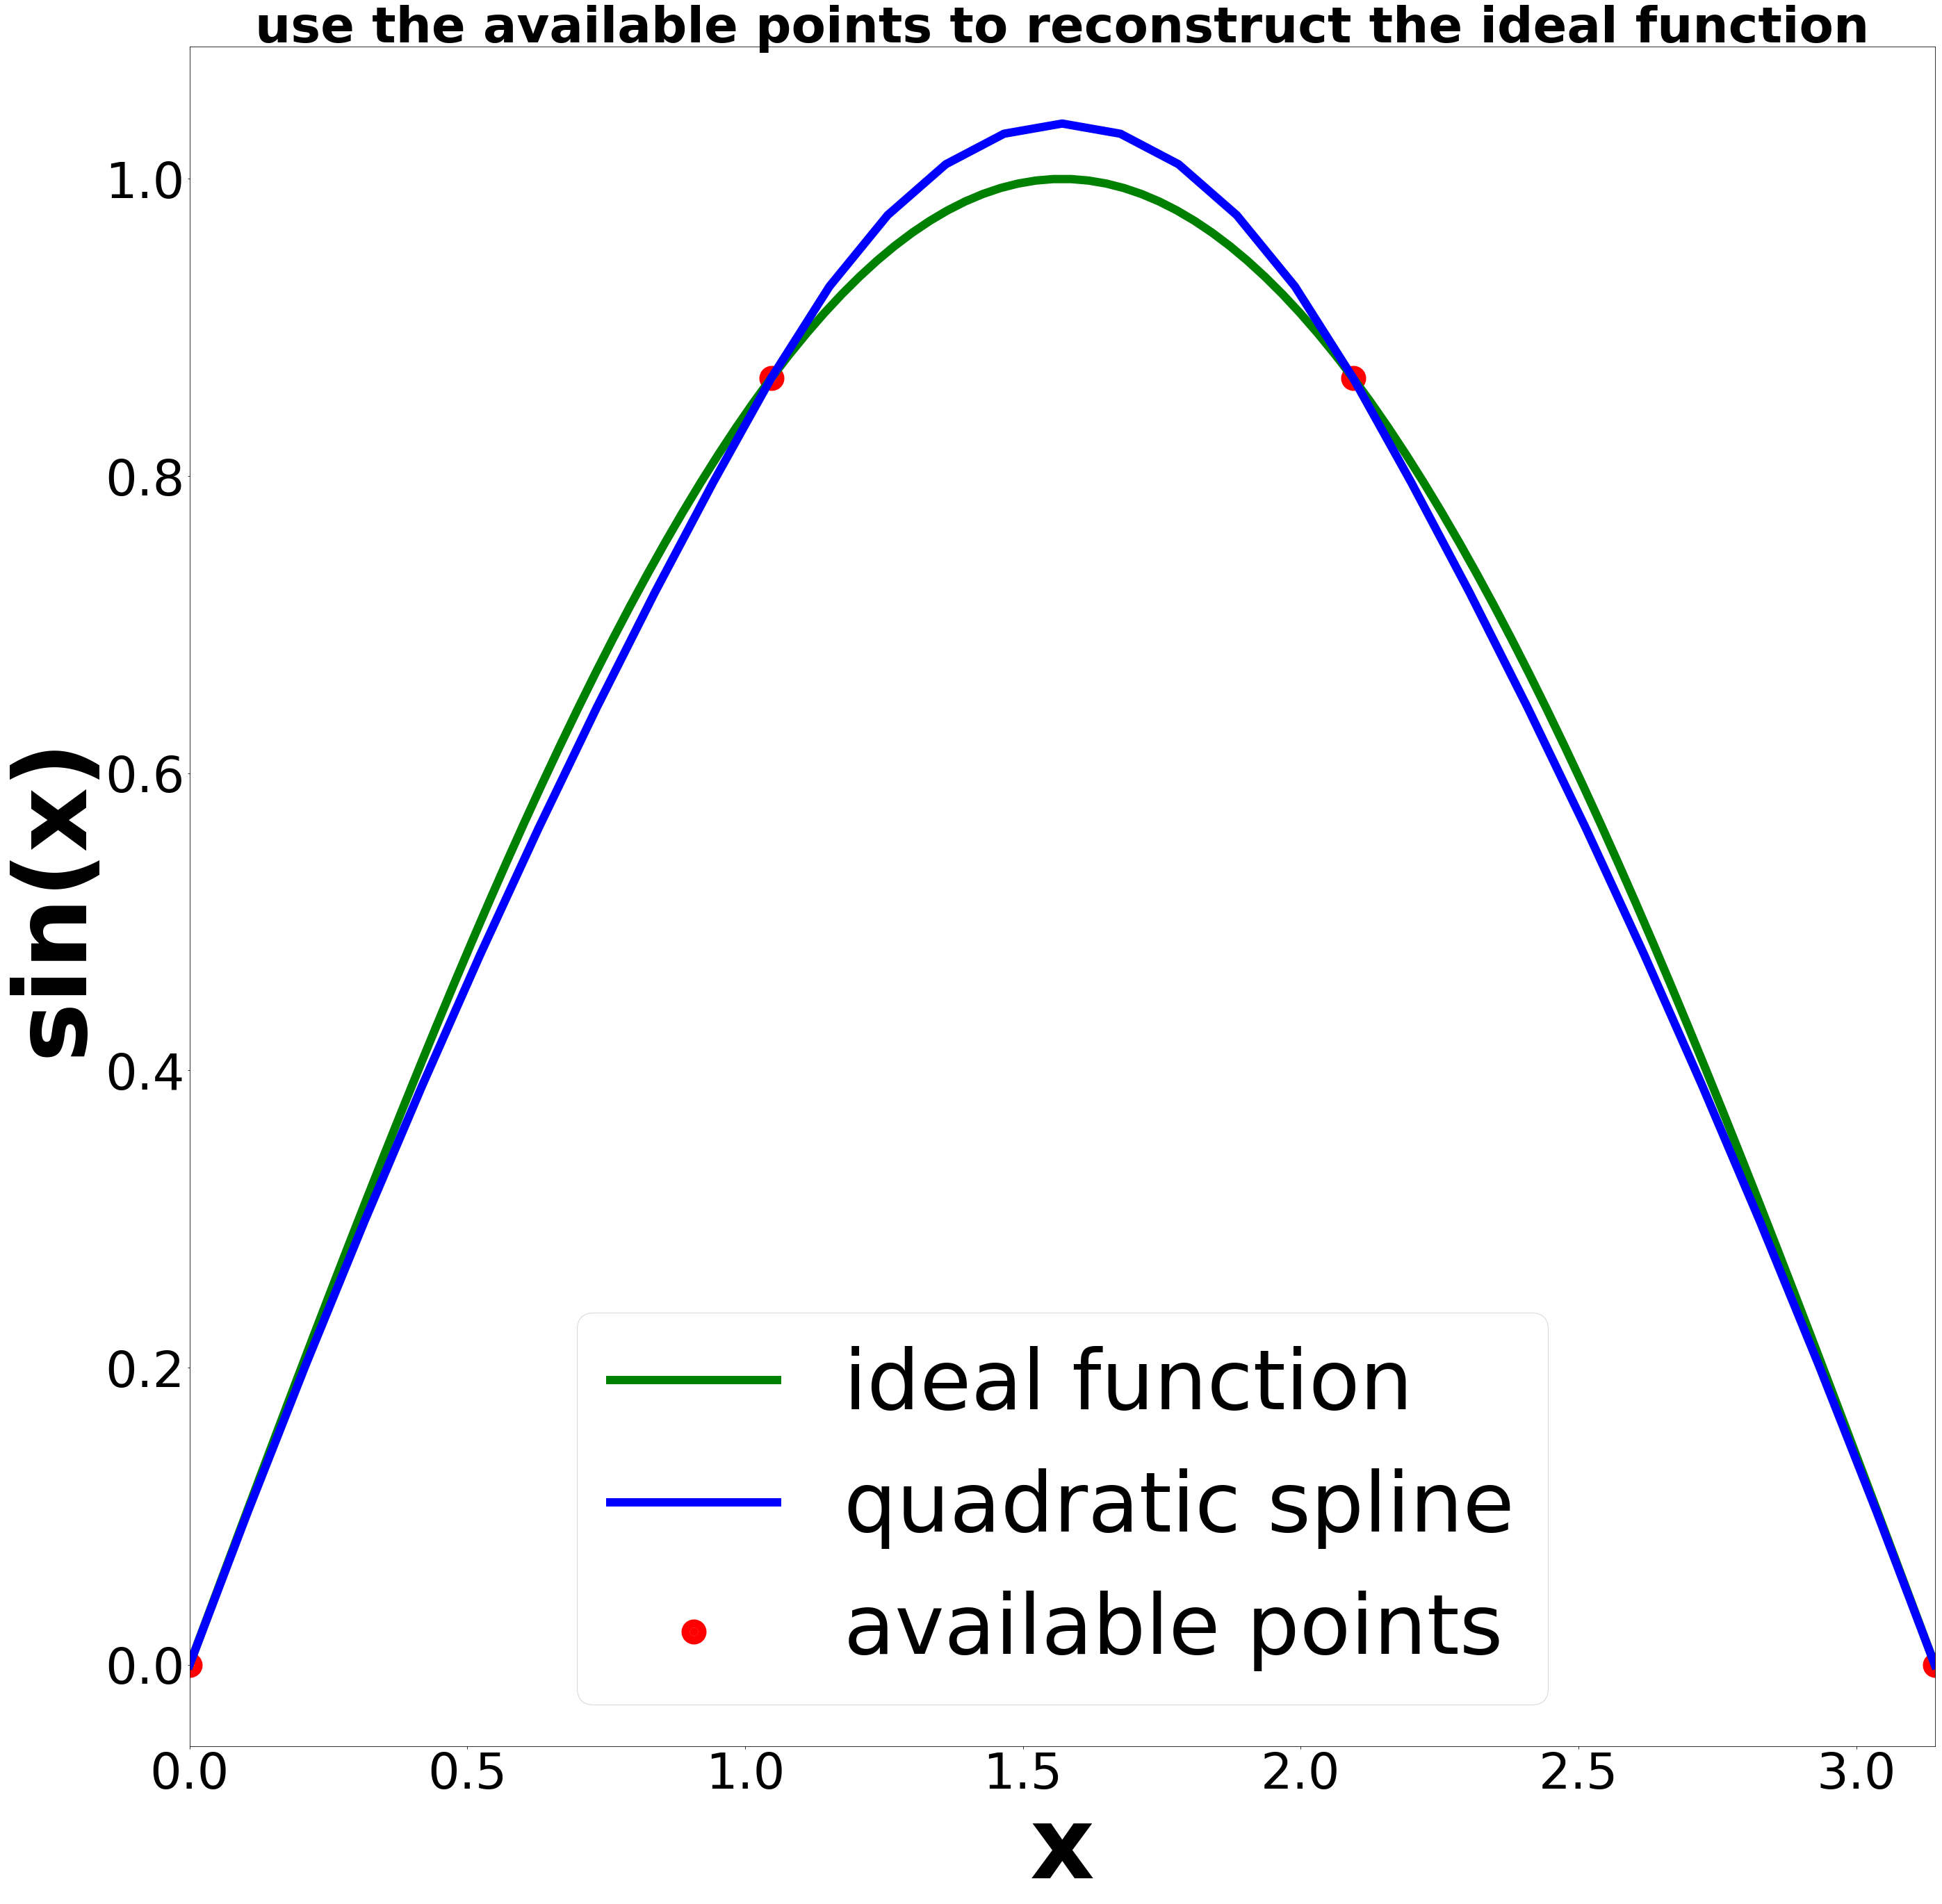

In [114]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points
x2 = []
y2 = []
z = np.empty(npt1)
z[0] = 1    # try to play with different values here

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    z[i+1] = -z[i] + 2*slope


    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + z[i]*delta*j + (z[i+1]-z[i])*delta*j*j/2/npt2)
        #print(x2[-1],y2[-1])    
#---------To interpolate based on the available points


#plot all points
image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(x0,f(x0),label='ideal function', color='g', linewidth=12)
plt.scatter(x1,f(x1), color='r', label='available points', linewidth=24, s=144)
plt.plot(x2,y2, 'b', label='quadratic spline', linewidth=12, markersize=24)

plt.legend(fontsize=120)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('sin(x)', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([0, pi])
plt.title('use the available points to reconstruct the ideal function', size=72, weight=1000)
plt.show()

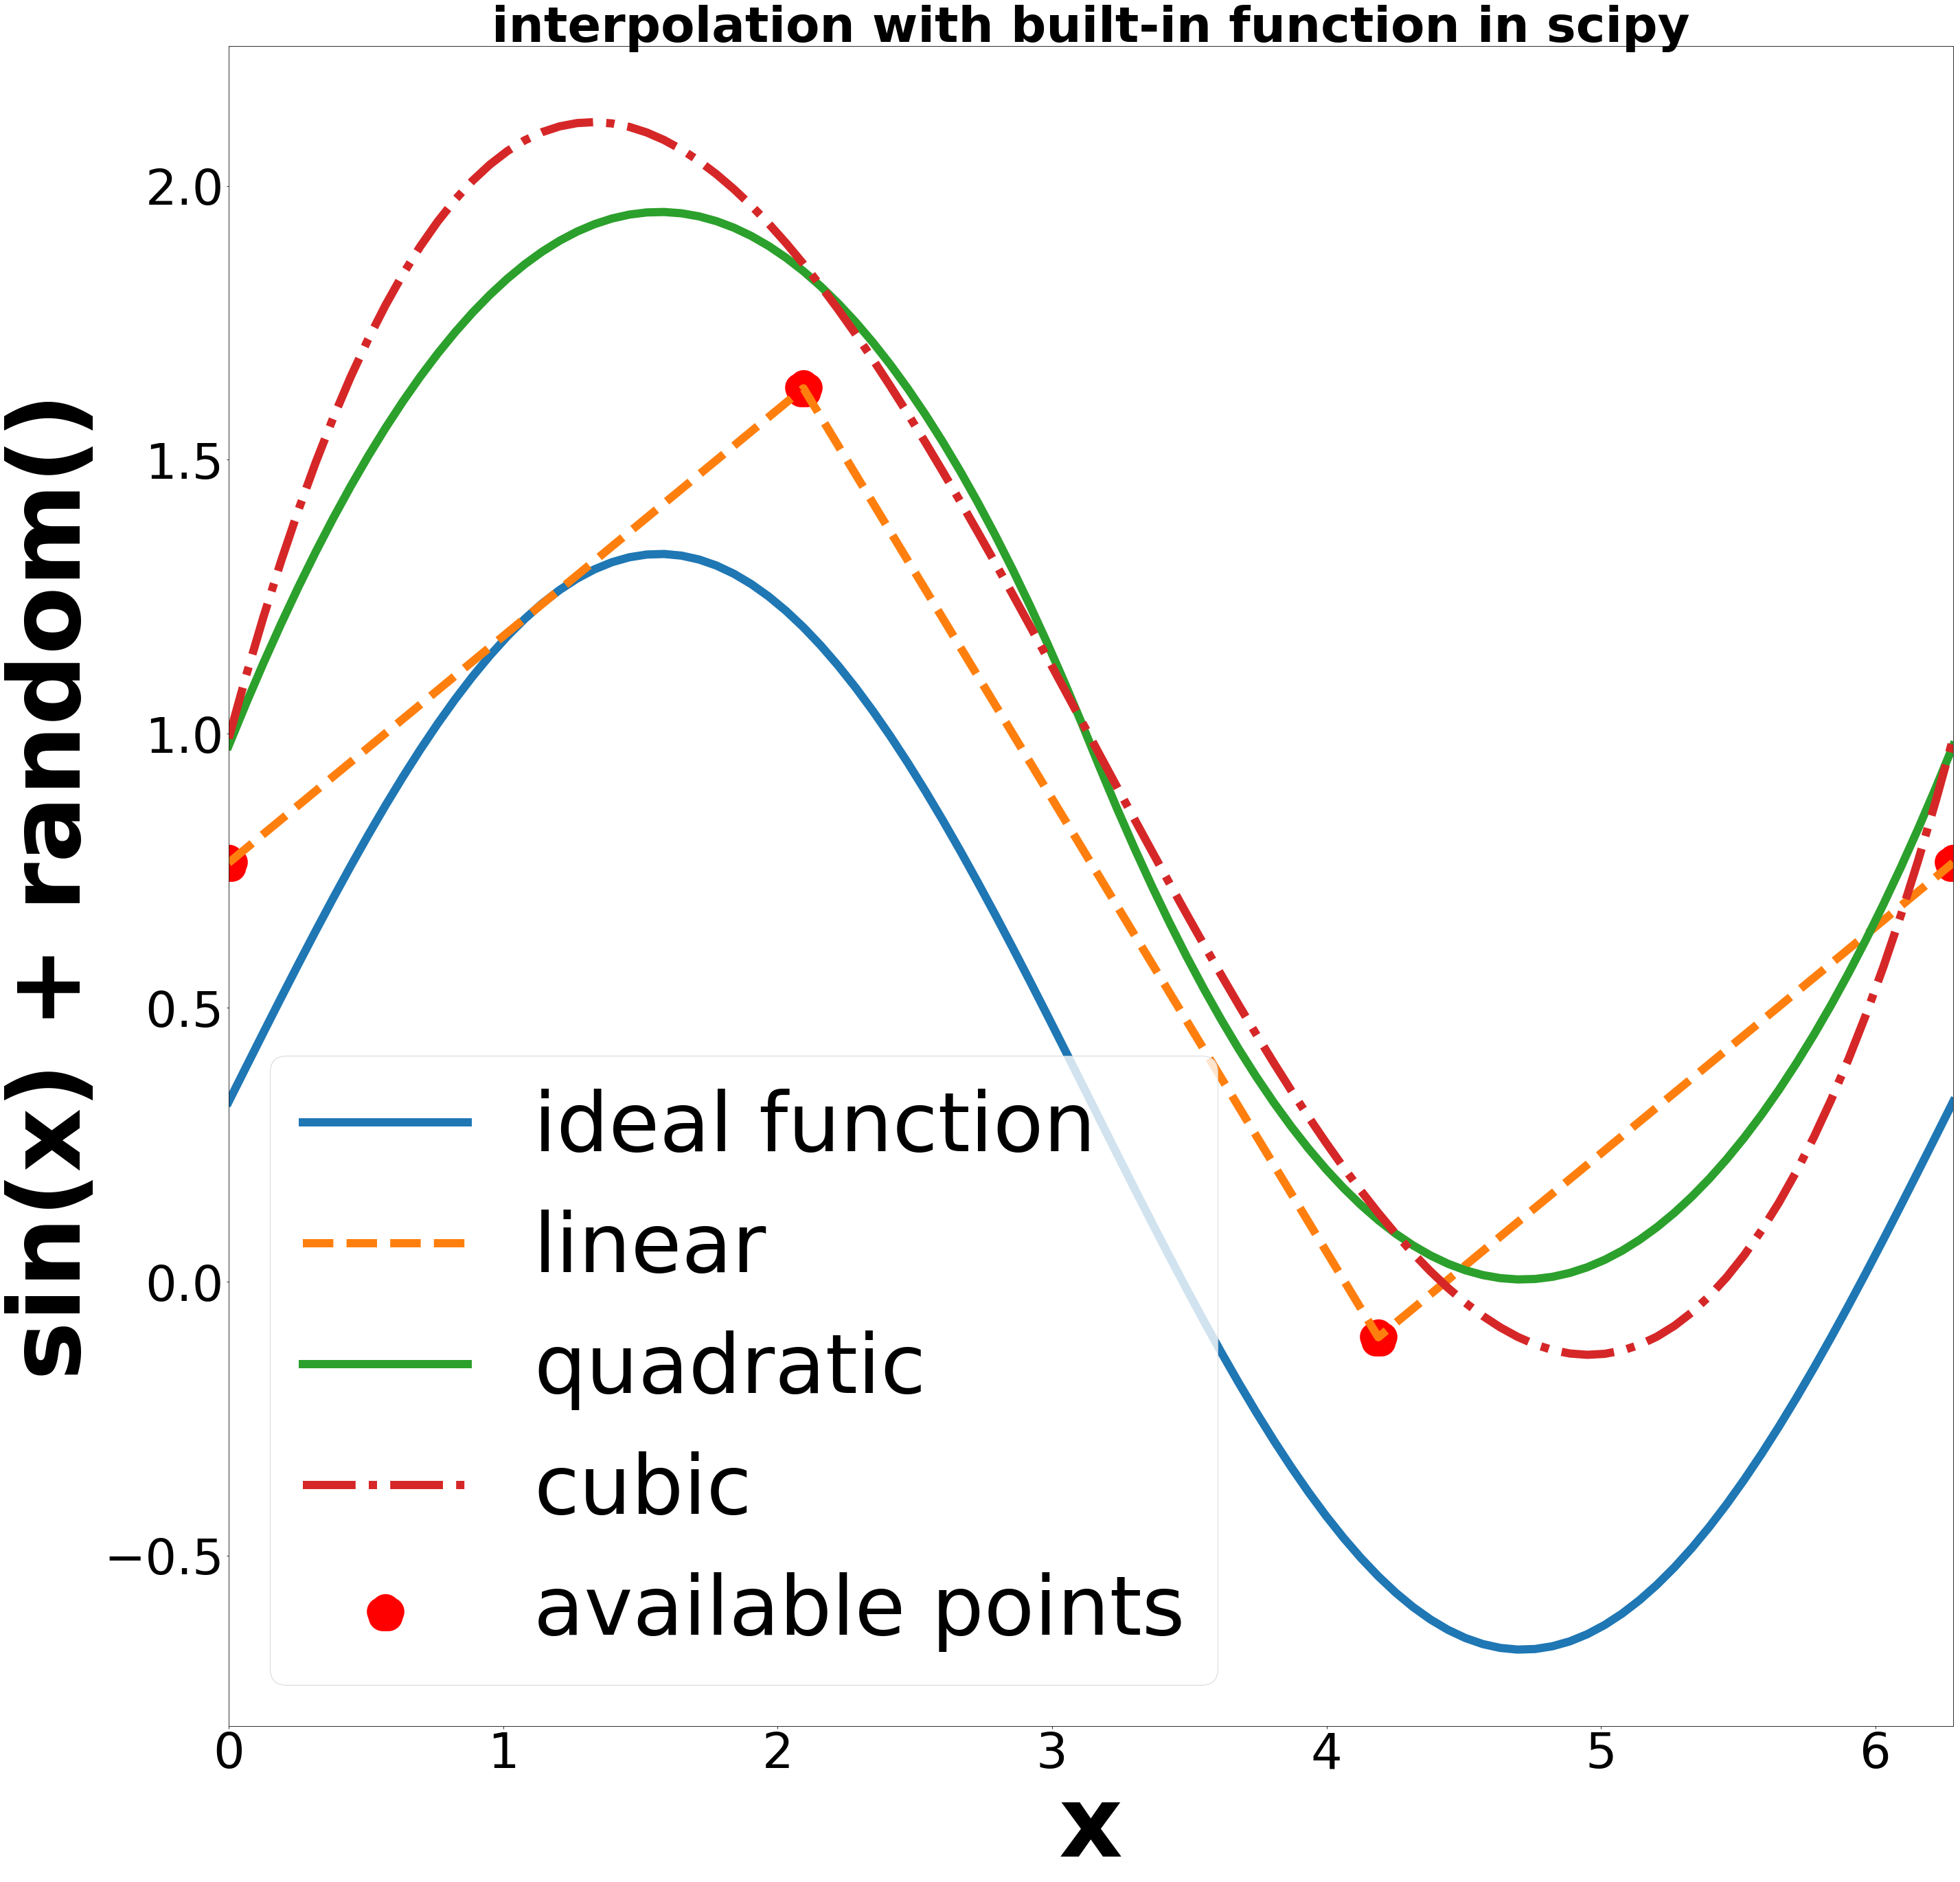

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.interpolate import *
from random import random

f = lambda x: np.sin(x)+random()
x_min, x_max = 0, 2*pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points

f_spline1 = interpolate.interp1d(x1, f(x1), kind='linear')
f_spline2 = interpolate.interp1d(x1, f(x1), kind='quadratic')
f_spline3 = interpolate.interp1d(x1, f(x1), kind='cubic')


#plot all points
image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(x0,f(x0),label='ideal function', linewidth=12)
plt.plot(x0,f_spline1(x0), '--',  label='linear', linewidth=12)
plt.plot(x0,f_spline2(x0), '-', label='quadratic', linewidth=12)
plt.plot(x0,f_spline3(x0), '-.', label='cubic', linewidth=12)
plt.scatter(x1,f(x1), c='r', s=180, marker='*', label='available points', linewidth=42)

plt.legend(fontsize=120)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('sin(x) + random()', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([x_min, x_max])
plt.title('interpolation with built-in function in scipy', size=72, weight=1000)
plt.show()

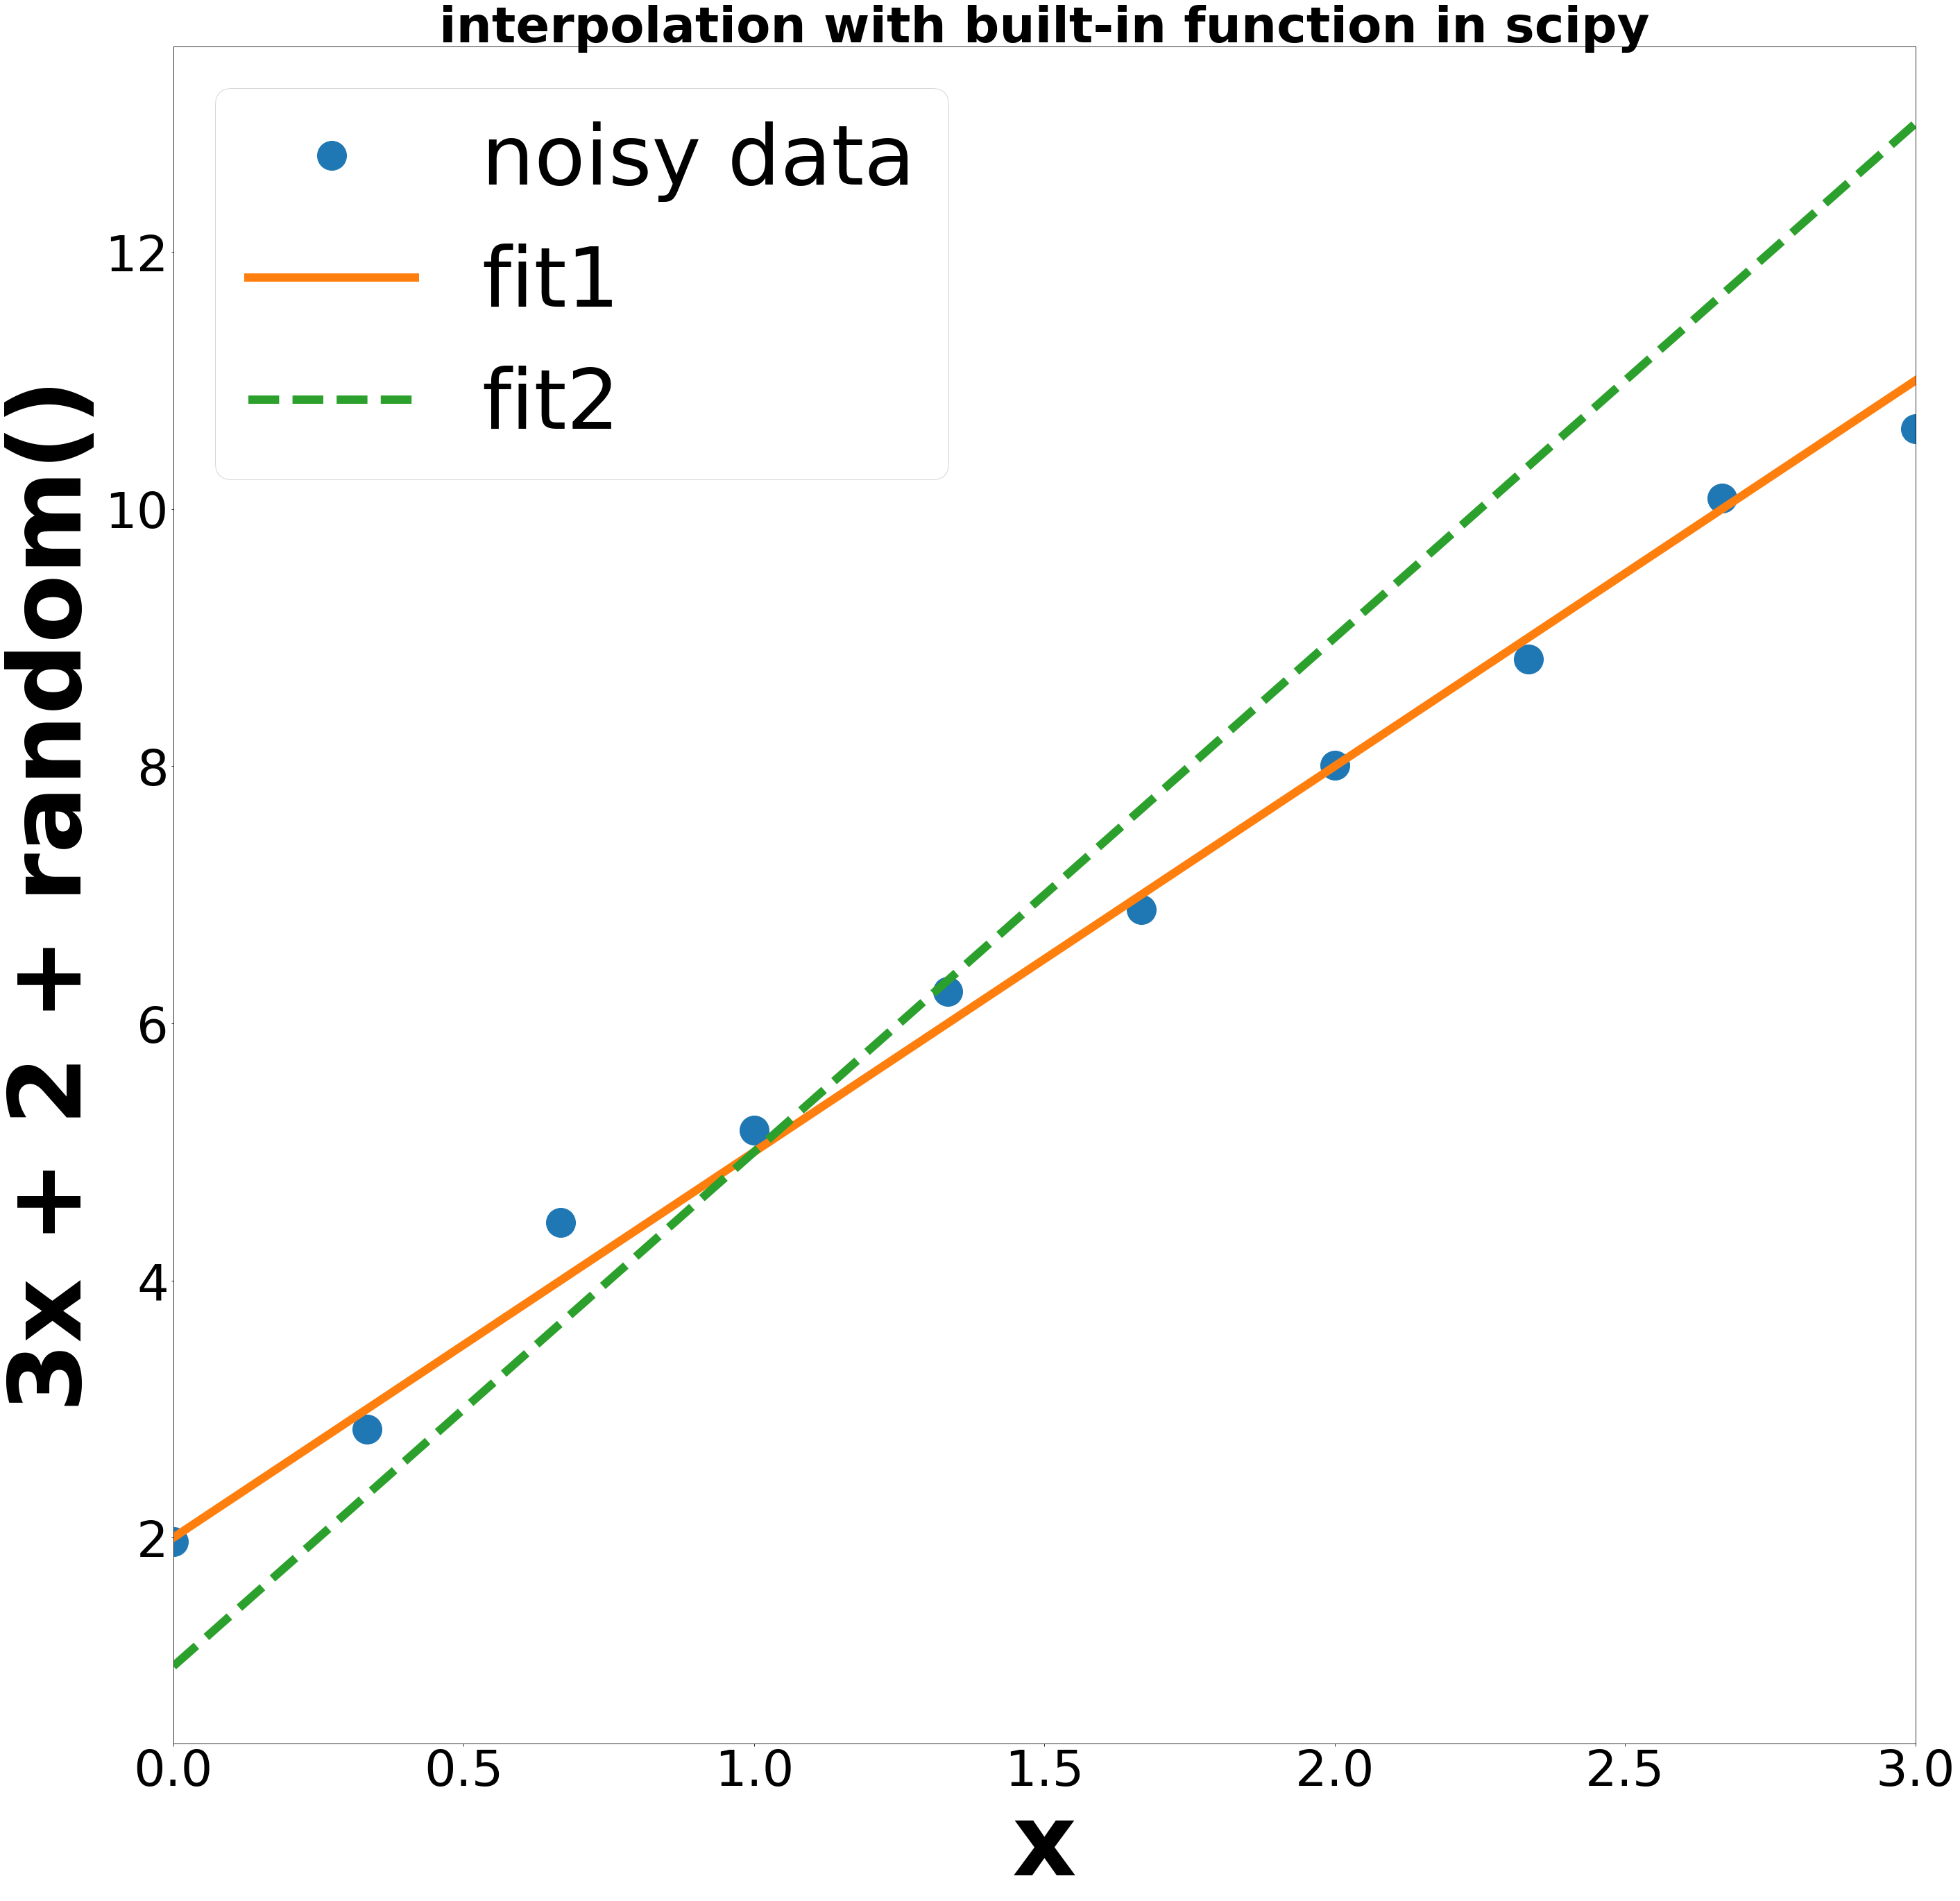

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as image

#define the function
f = lambda x: 3*x+2

#define the paramters for the plot
a,b = 0,3
npoints = 10

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5

image.rcParams["figure.figsize"] = [45, 45] 
plt.plot(x,y, 'o', label='noisy data', linewidth=12, markersize=42)
plt.plot(x,f(x), '-', label='fit1', linewidth=12)
plt.plot(x,4*x+1, '--', label='fit2', linewidth=12)

plt.legend(fontsize=120)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('3x + 2 + random()', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([a,b])
plt.title('interpolation with built-in function in scipy', size=72, weight=1000)
plt.show()

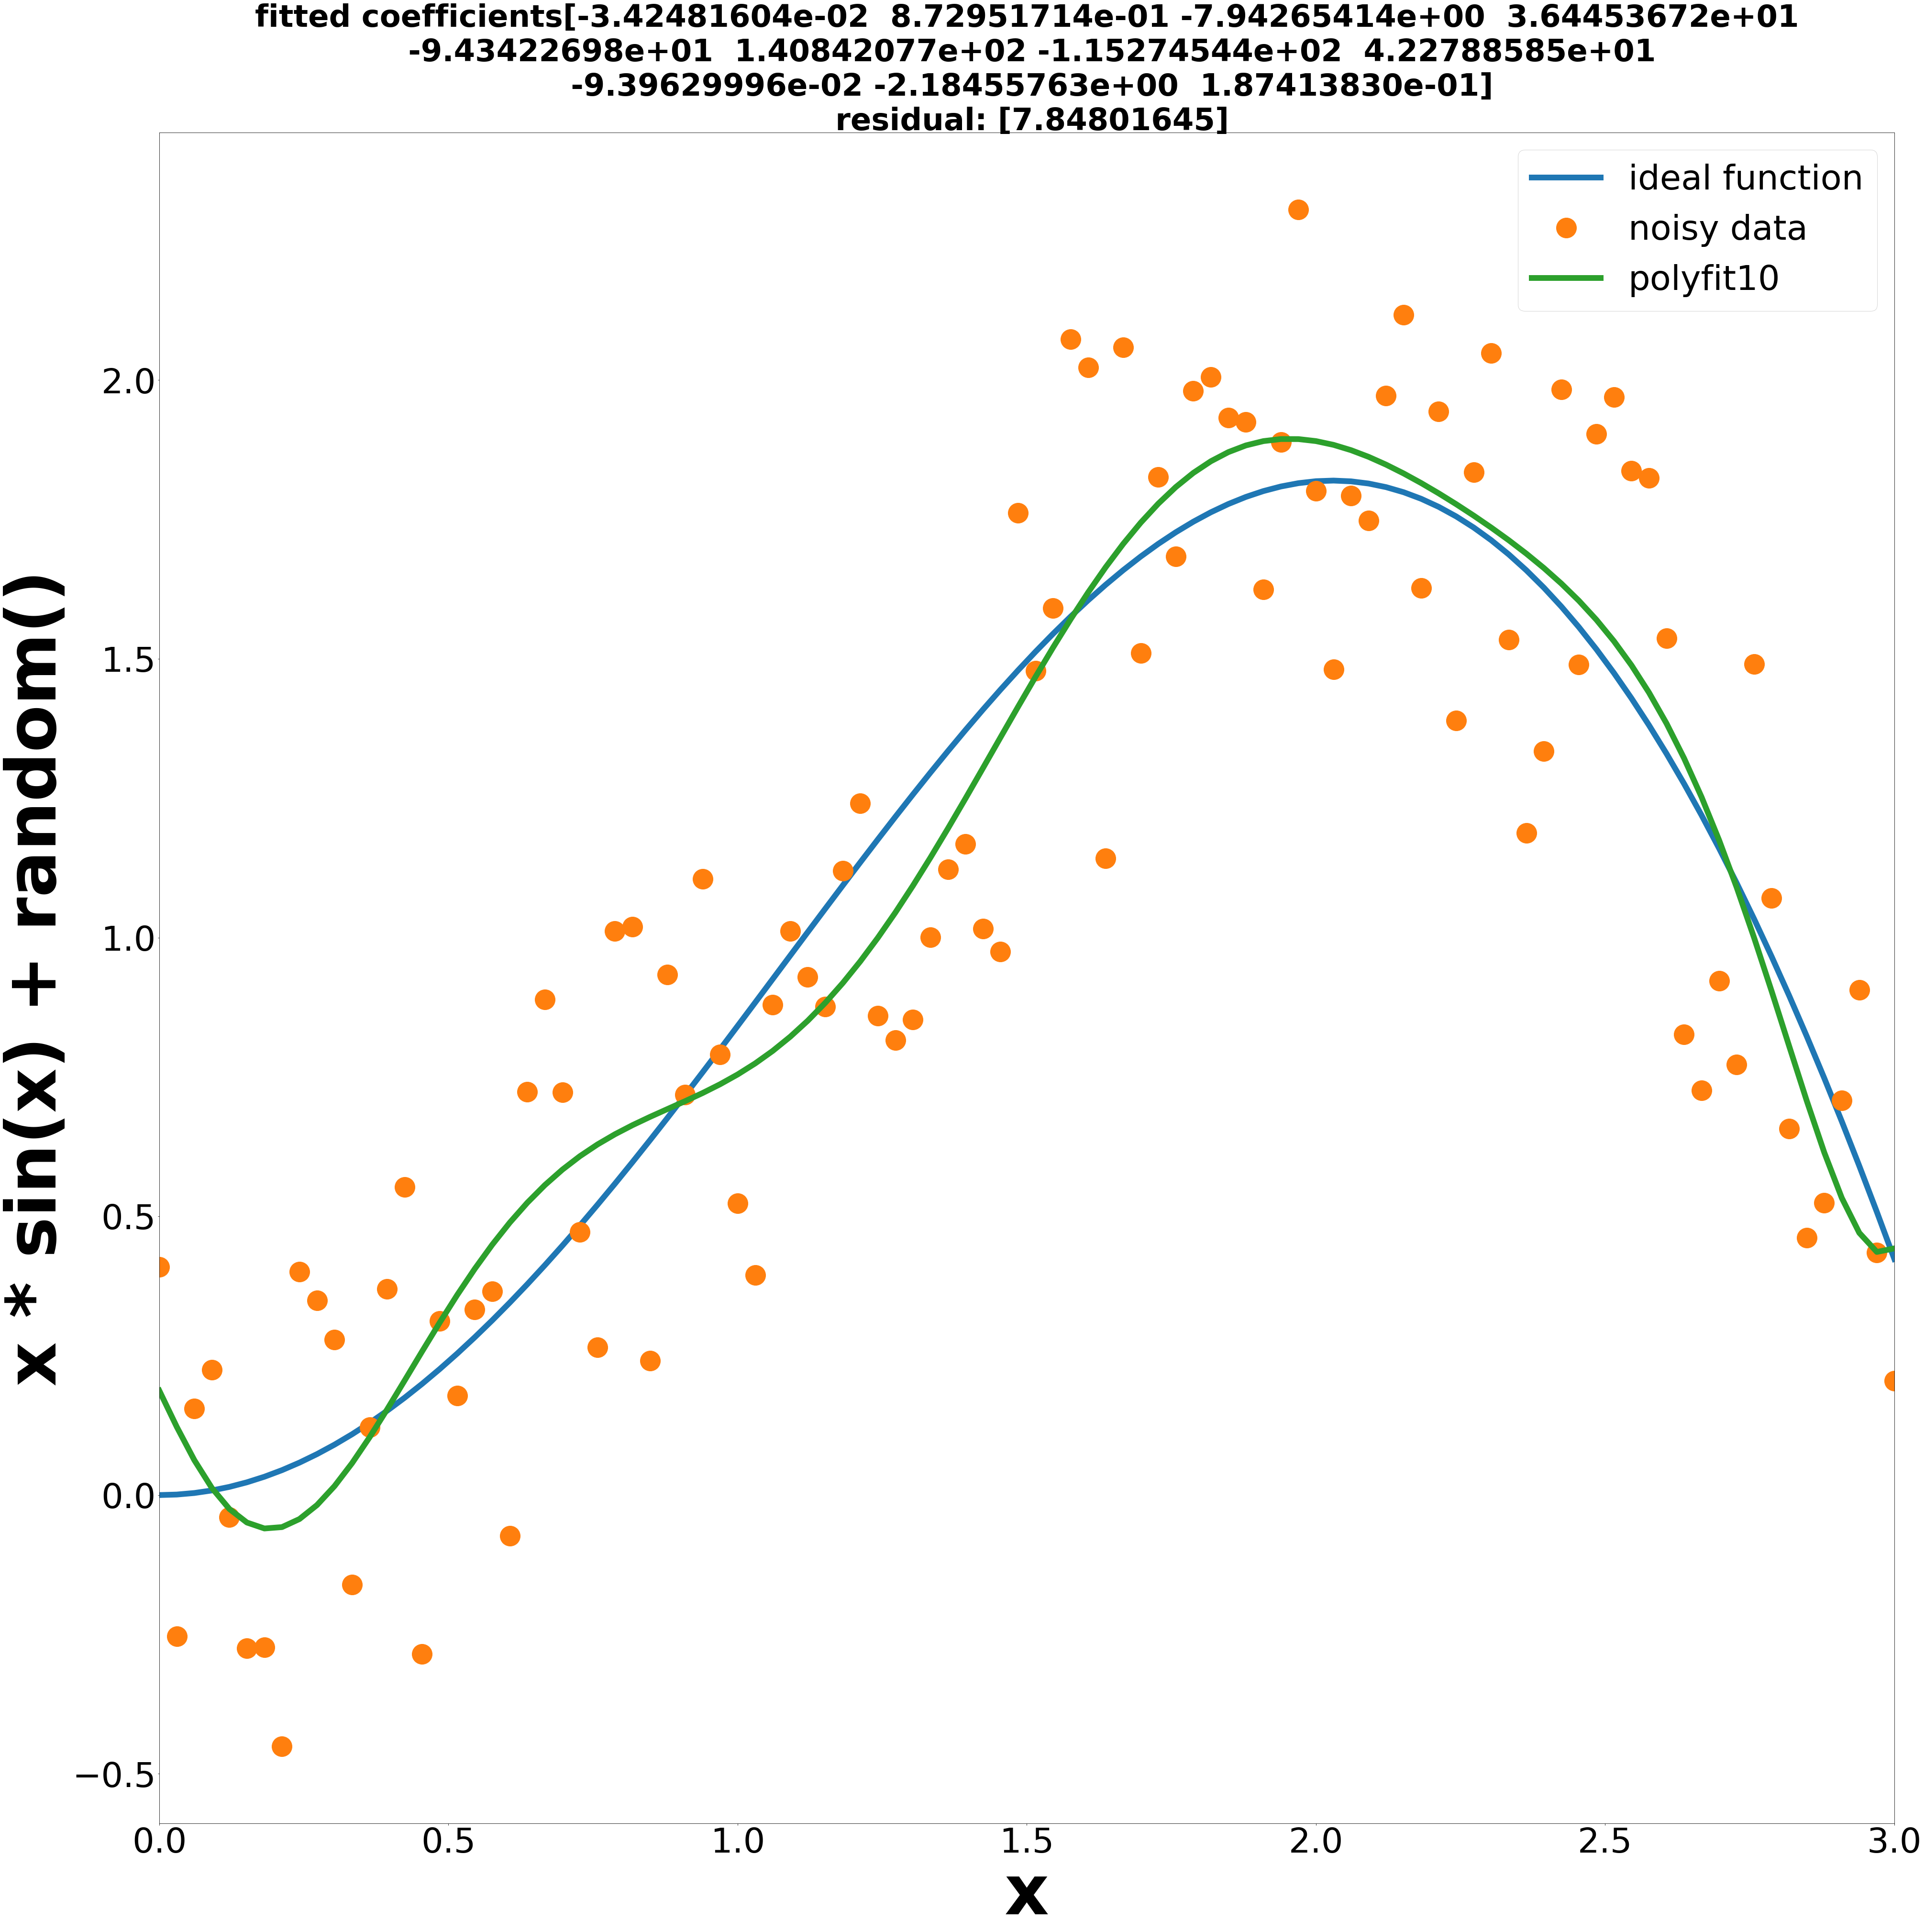

In [139]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as image

#plt.figure(figsize=[12, 8])
#define the function
f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100
order = 10

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5

fit = np.polyfit(x, y, order, full=True)
y_p = np.polyval(fit[0], x)

image.rcParams["figure.figsize"] = [65, 65] 
plt.plot(x,f(x), label='ideal function', linewidth=12)
plt.plot(x,y, 'o', label='noisy data', linewidth=12, markersize=42)
plt.plot(x,y_p, label='polyfit'+str(order), linewidth=12)

plt.legend(fontsize=72)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('x * sin(x) + random()', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([a,b])
plt.title('fitted coefficients' + str(fit[0]) + '\n residual: ' + str(fit[1]), size=64, weight=1000)
plt.show()

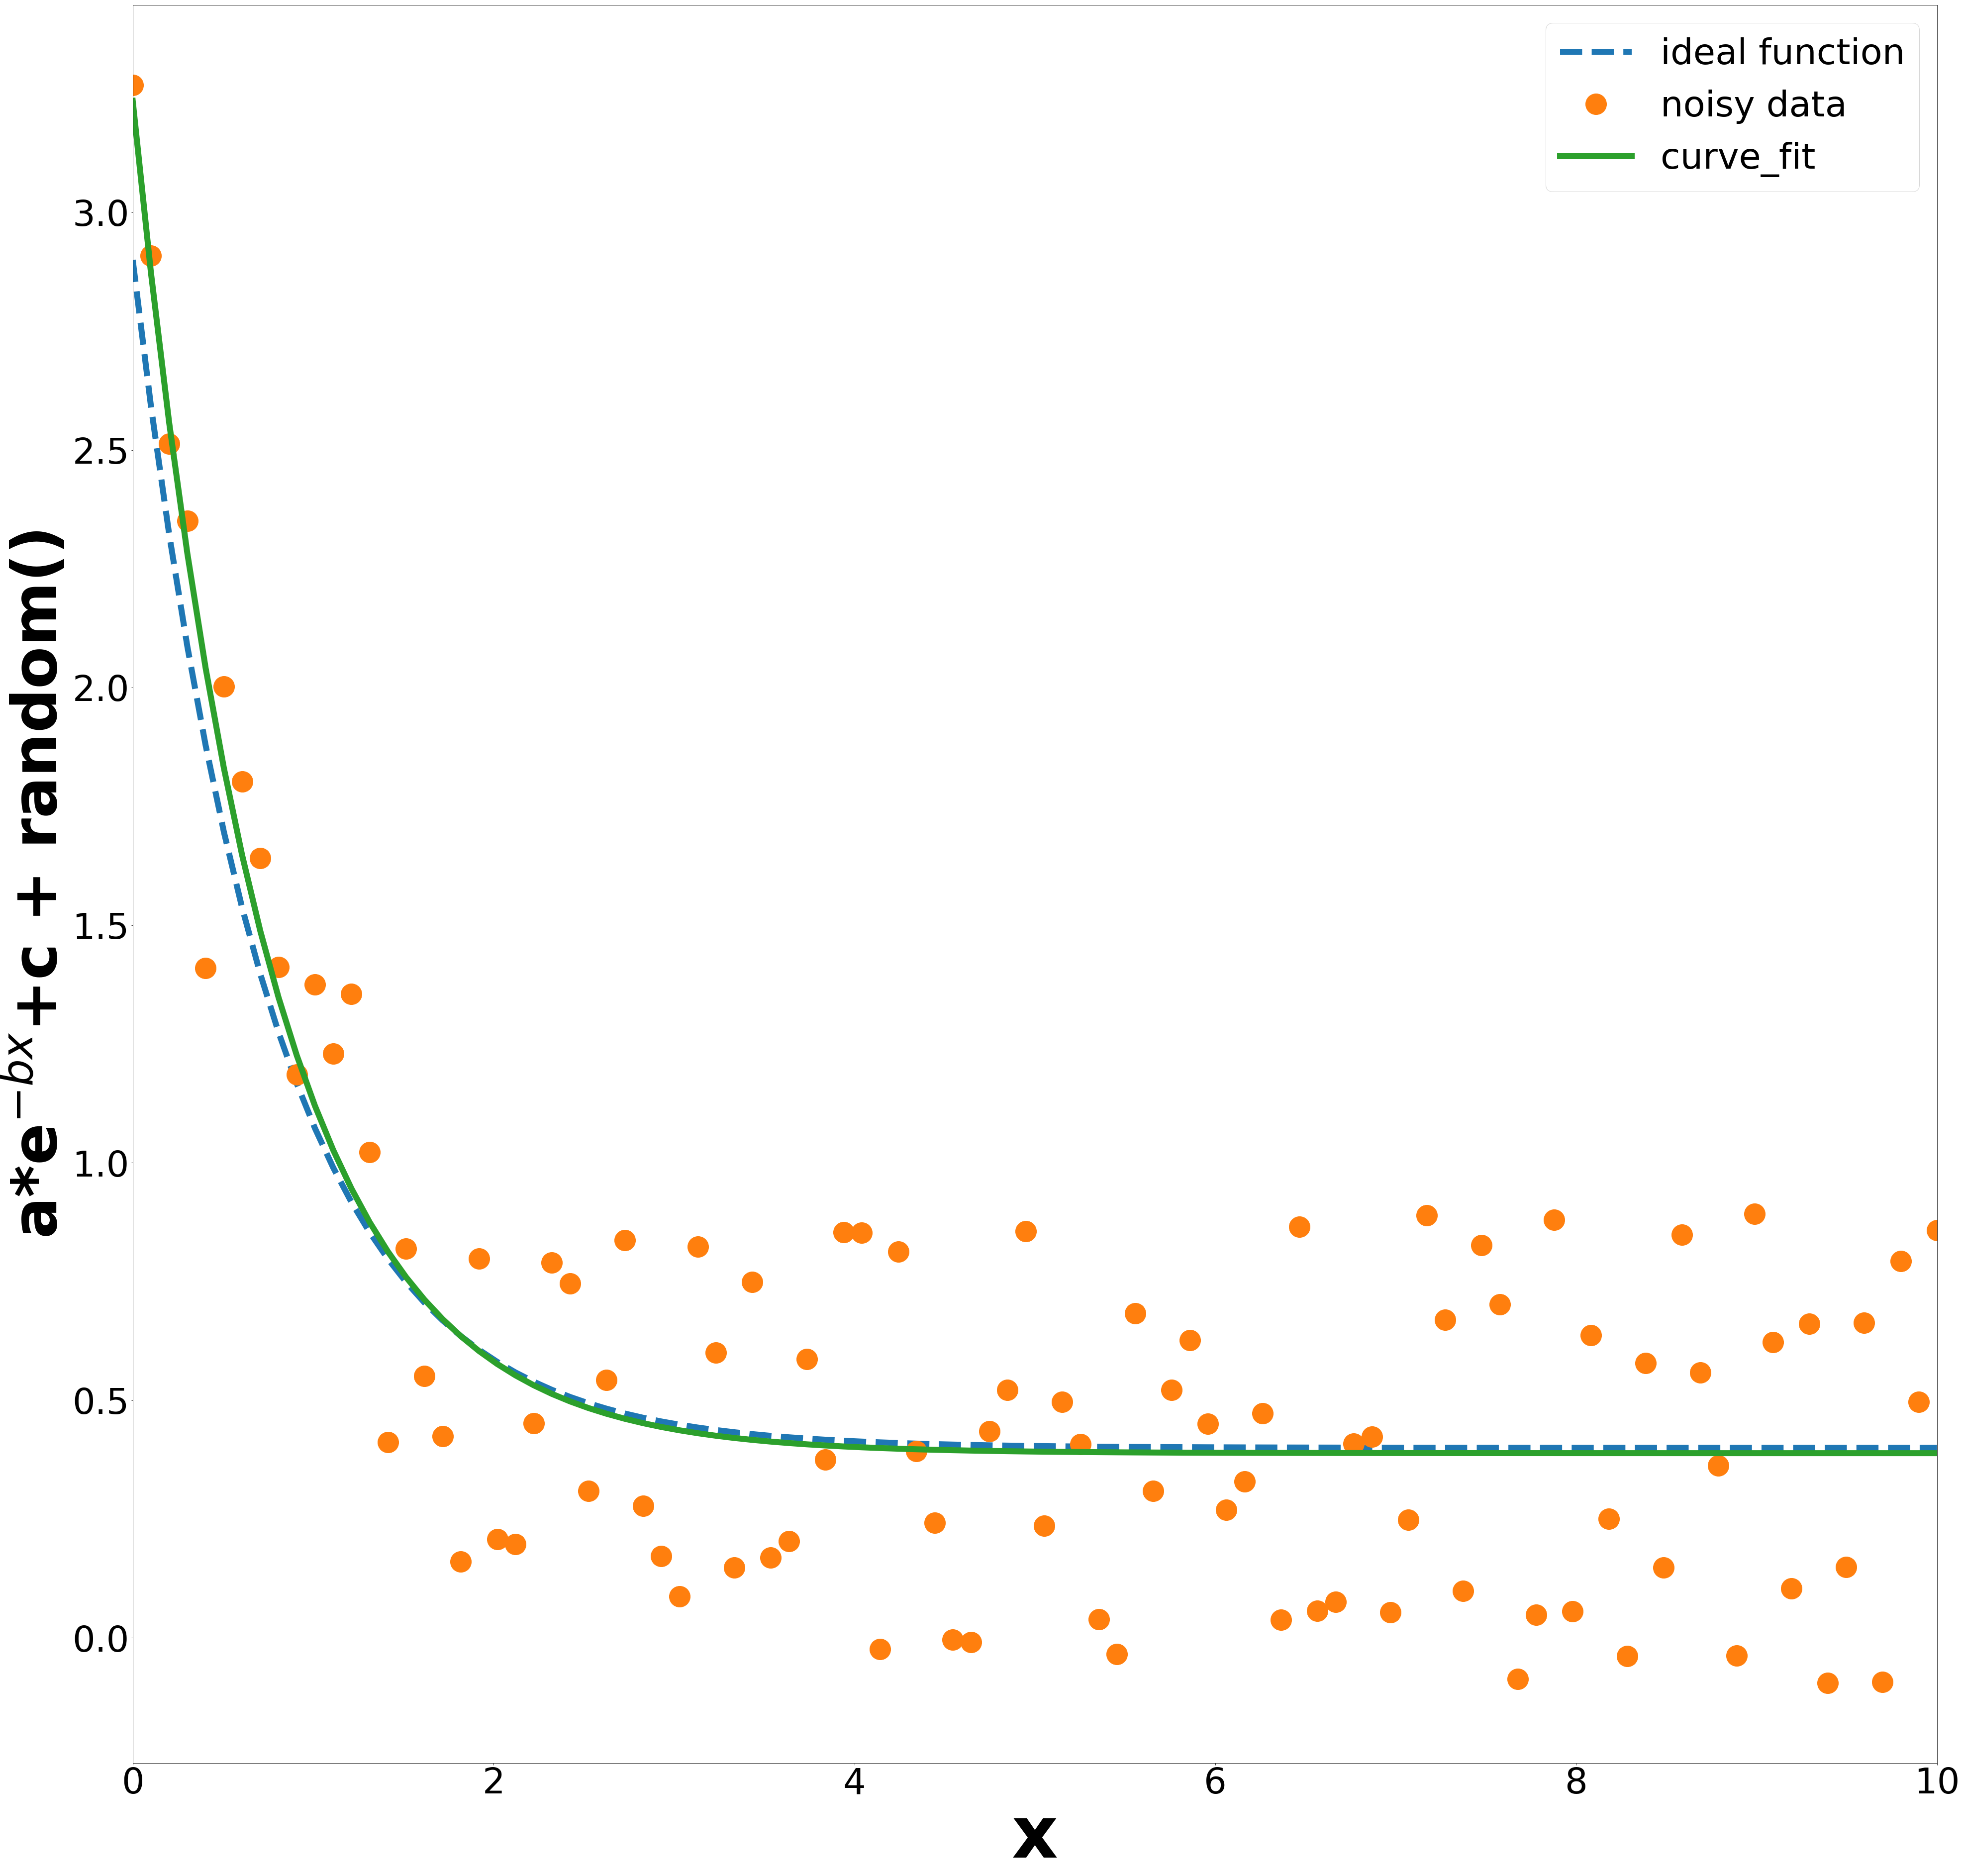

original coefficients:  2.500,  1.300,  0.400
fitted   coefficients:  2.846,  1.346,  0.389


In [145]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as image

#plt.figure(figsize=[10, 6])


#define the function
f = lambda x,a,b,c: a*np.exp(-b*x)+c  

#define the paramters for the plot
x_min, x_max = 0, 10
npoints = 100
a,b,c = 2.5, 1.3, 0.4

x = np.linspace(x_min, x_max, npoints)
y = f(x,a,b,c) + np.random.rand(npoints) - 0.5

#do the curve fit
params, extras = curve_fit(f, x, y)

image.rcParams["figure.figsize"] = [65, 65] 
plt.plot(x,f(x,a,b,c), '--', label='ideal function', linewidth=12)
plt.plot(x,y, 'o', label='noisy data', linewidth=12, markersize=42)
plt.plot(x,f(x,params[0],params[1],params[2]), label='curve_fit', linewidth=12)

plt.legend(fontsize=72)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('a*e$^{-bx}$+c + random()', size=124, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([x_min, x_max])
plt.show()

print('original coefficients: %6.3f, %6.3f, %6.3f' %(a,b,c))
print('fitted   coefficients: %6.3f, %6.3f, %6.3f' %(params[0], params[1], params[2]))

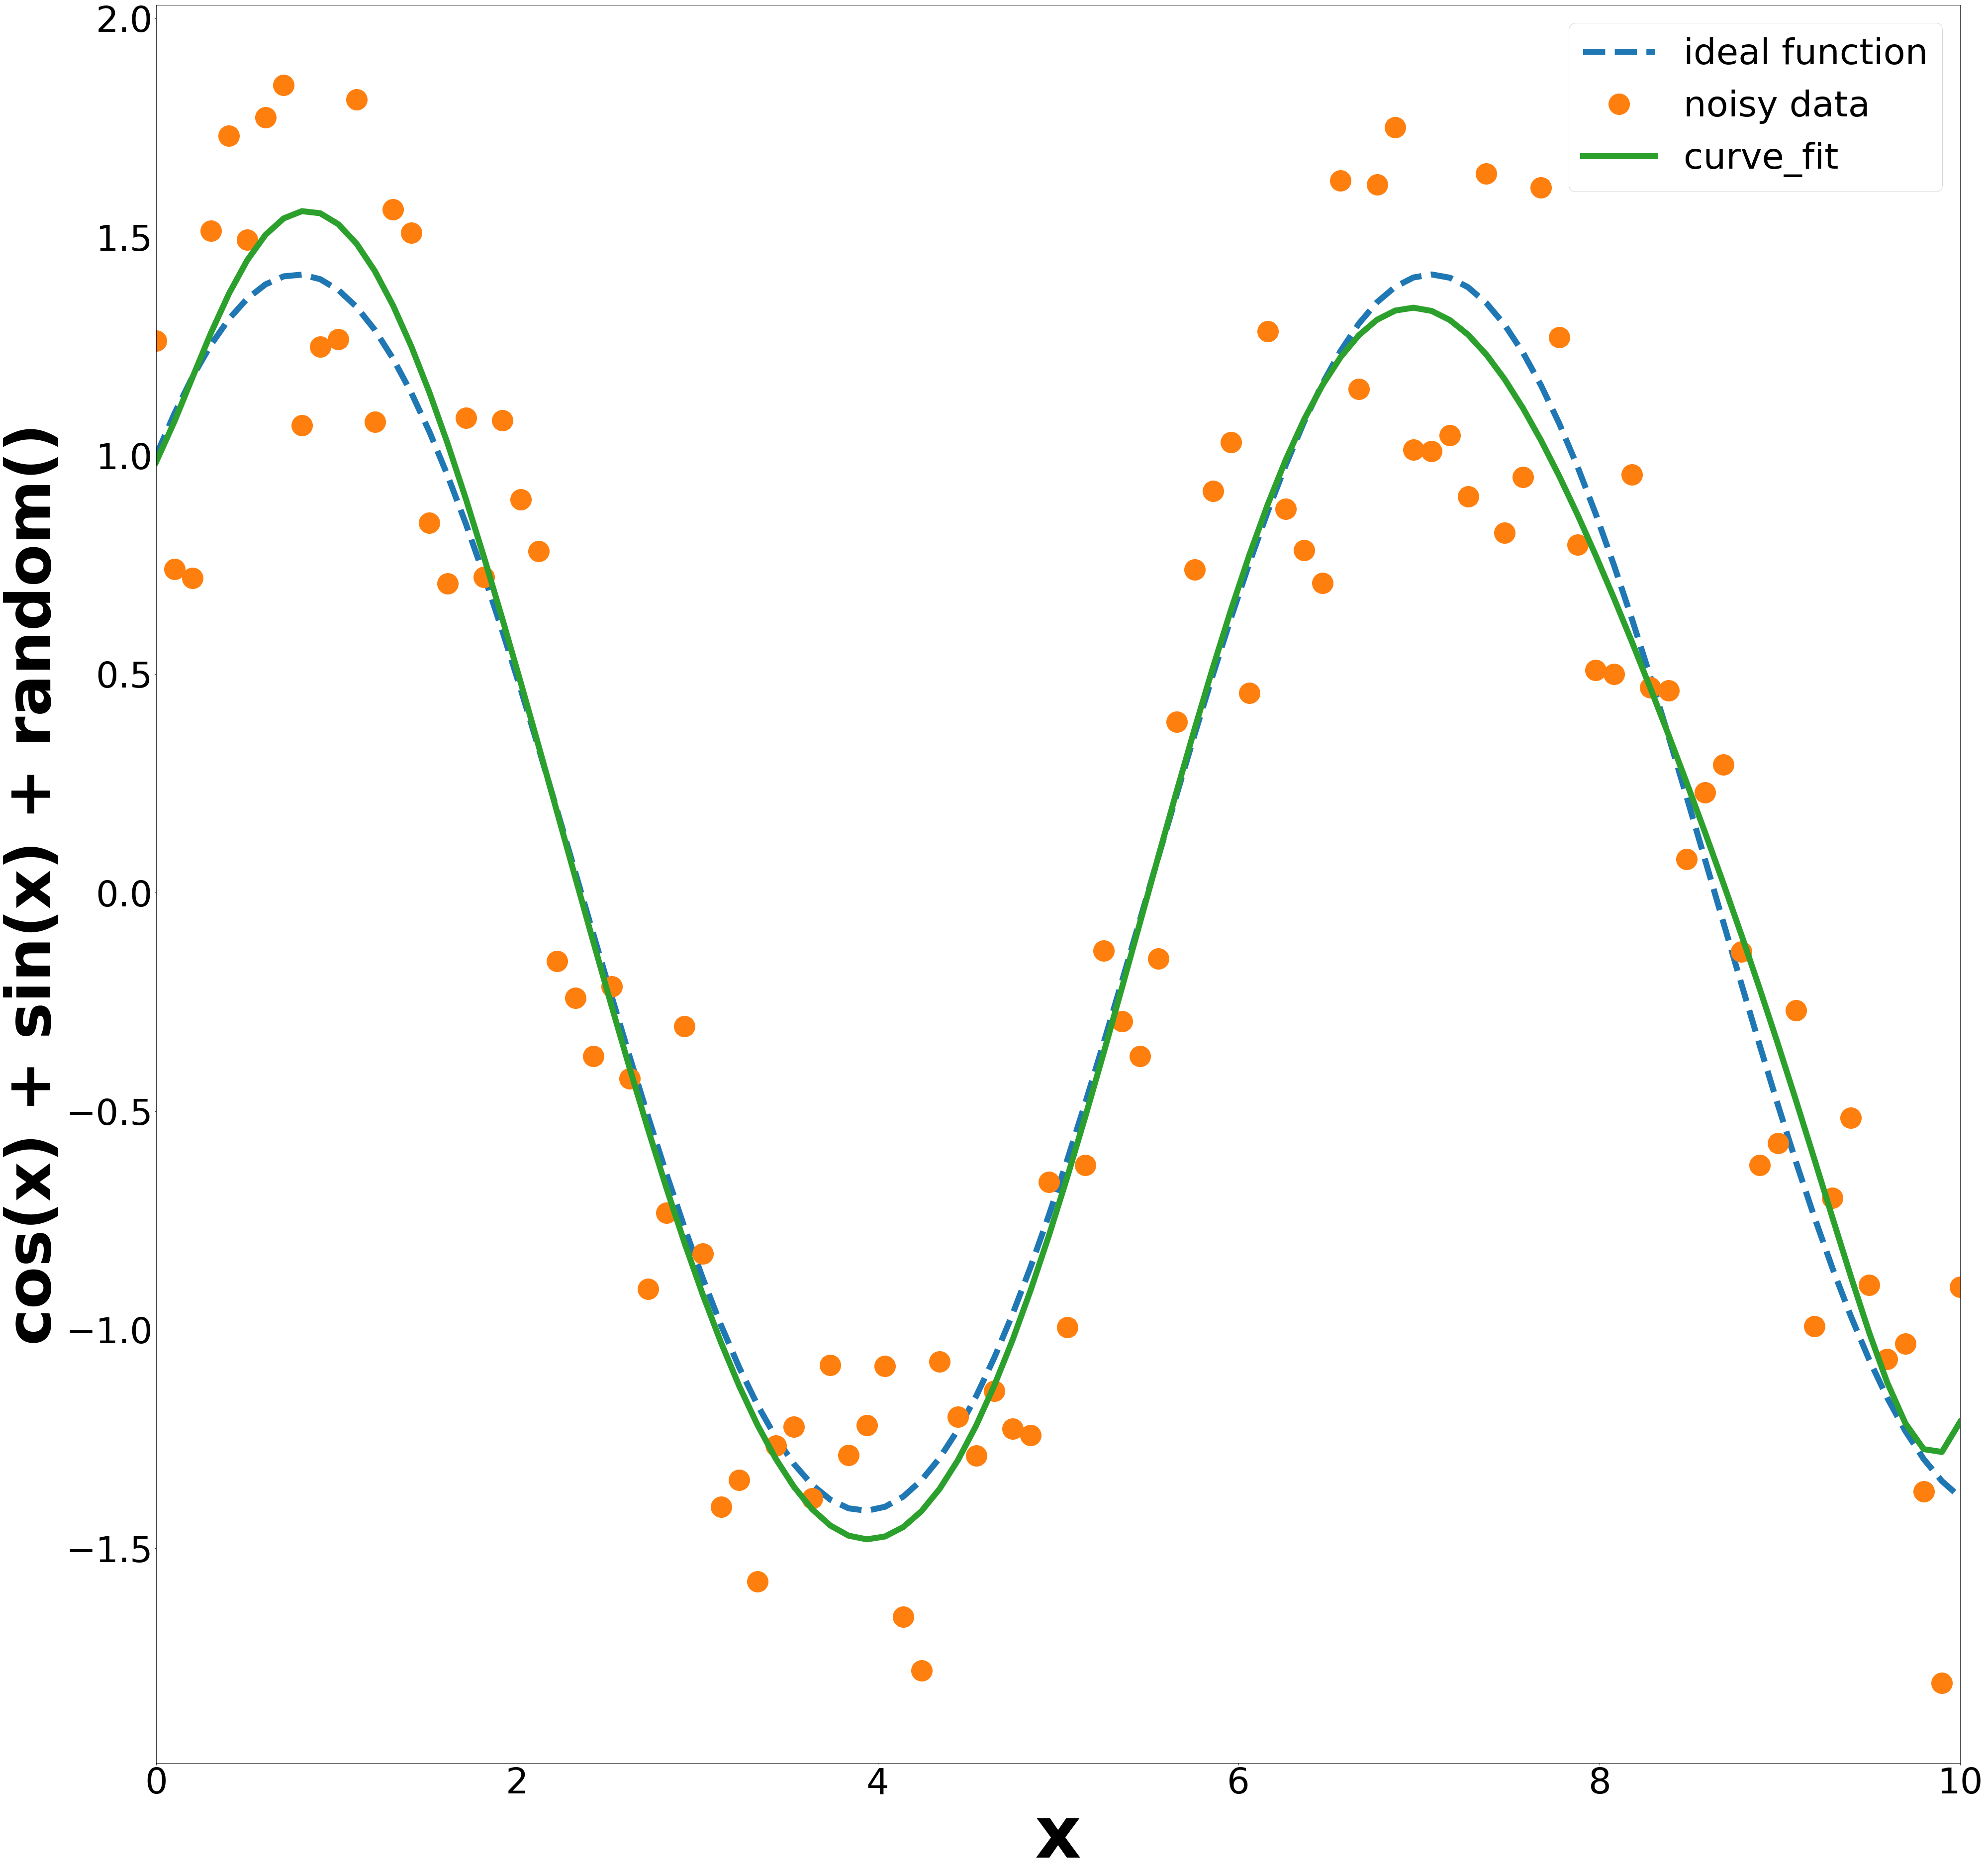

In [153]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as image

#define the function
f = lambda x: cos(x) + sin(x)

#define the paramters for the plot
x_min, x_max = 0, 10
npoints = 100

x = np.linspace(x_min, x_max, npoints)
y = f(x) + np.random.rand(npoints) - 0.5

#do the curve fit
#params, extras = curve_fit(f, x, y)
fit = np.polyfit(x, y, order, full=True)
y_p = np.polyval(fit[0], x)

image.rcParams["figure.figsize"] = [65, 65] 
plt.plot(x, f(x), '--', label='ideal function', linewidth=12)
plt.plot(x,y, 'o', label='noisy data', linewidth=12, markersize=42)
plt.plot(x, y_p, label='curve_fit', linewidth=12)

plt.legend(fontsize=72)
plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('cos(x) + sin(x) + random()', size=124, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([x_min, x_max])
plt.show()


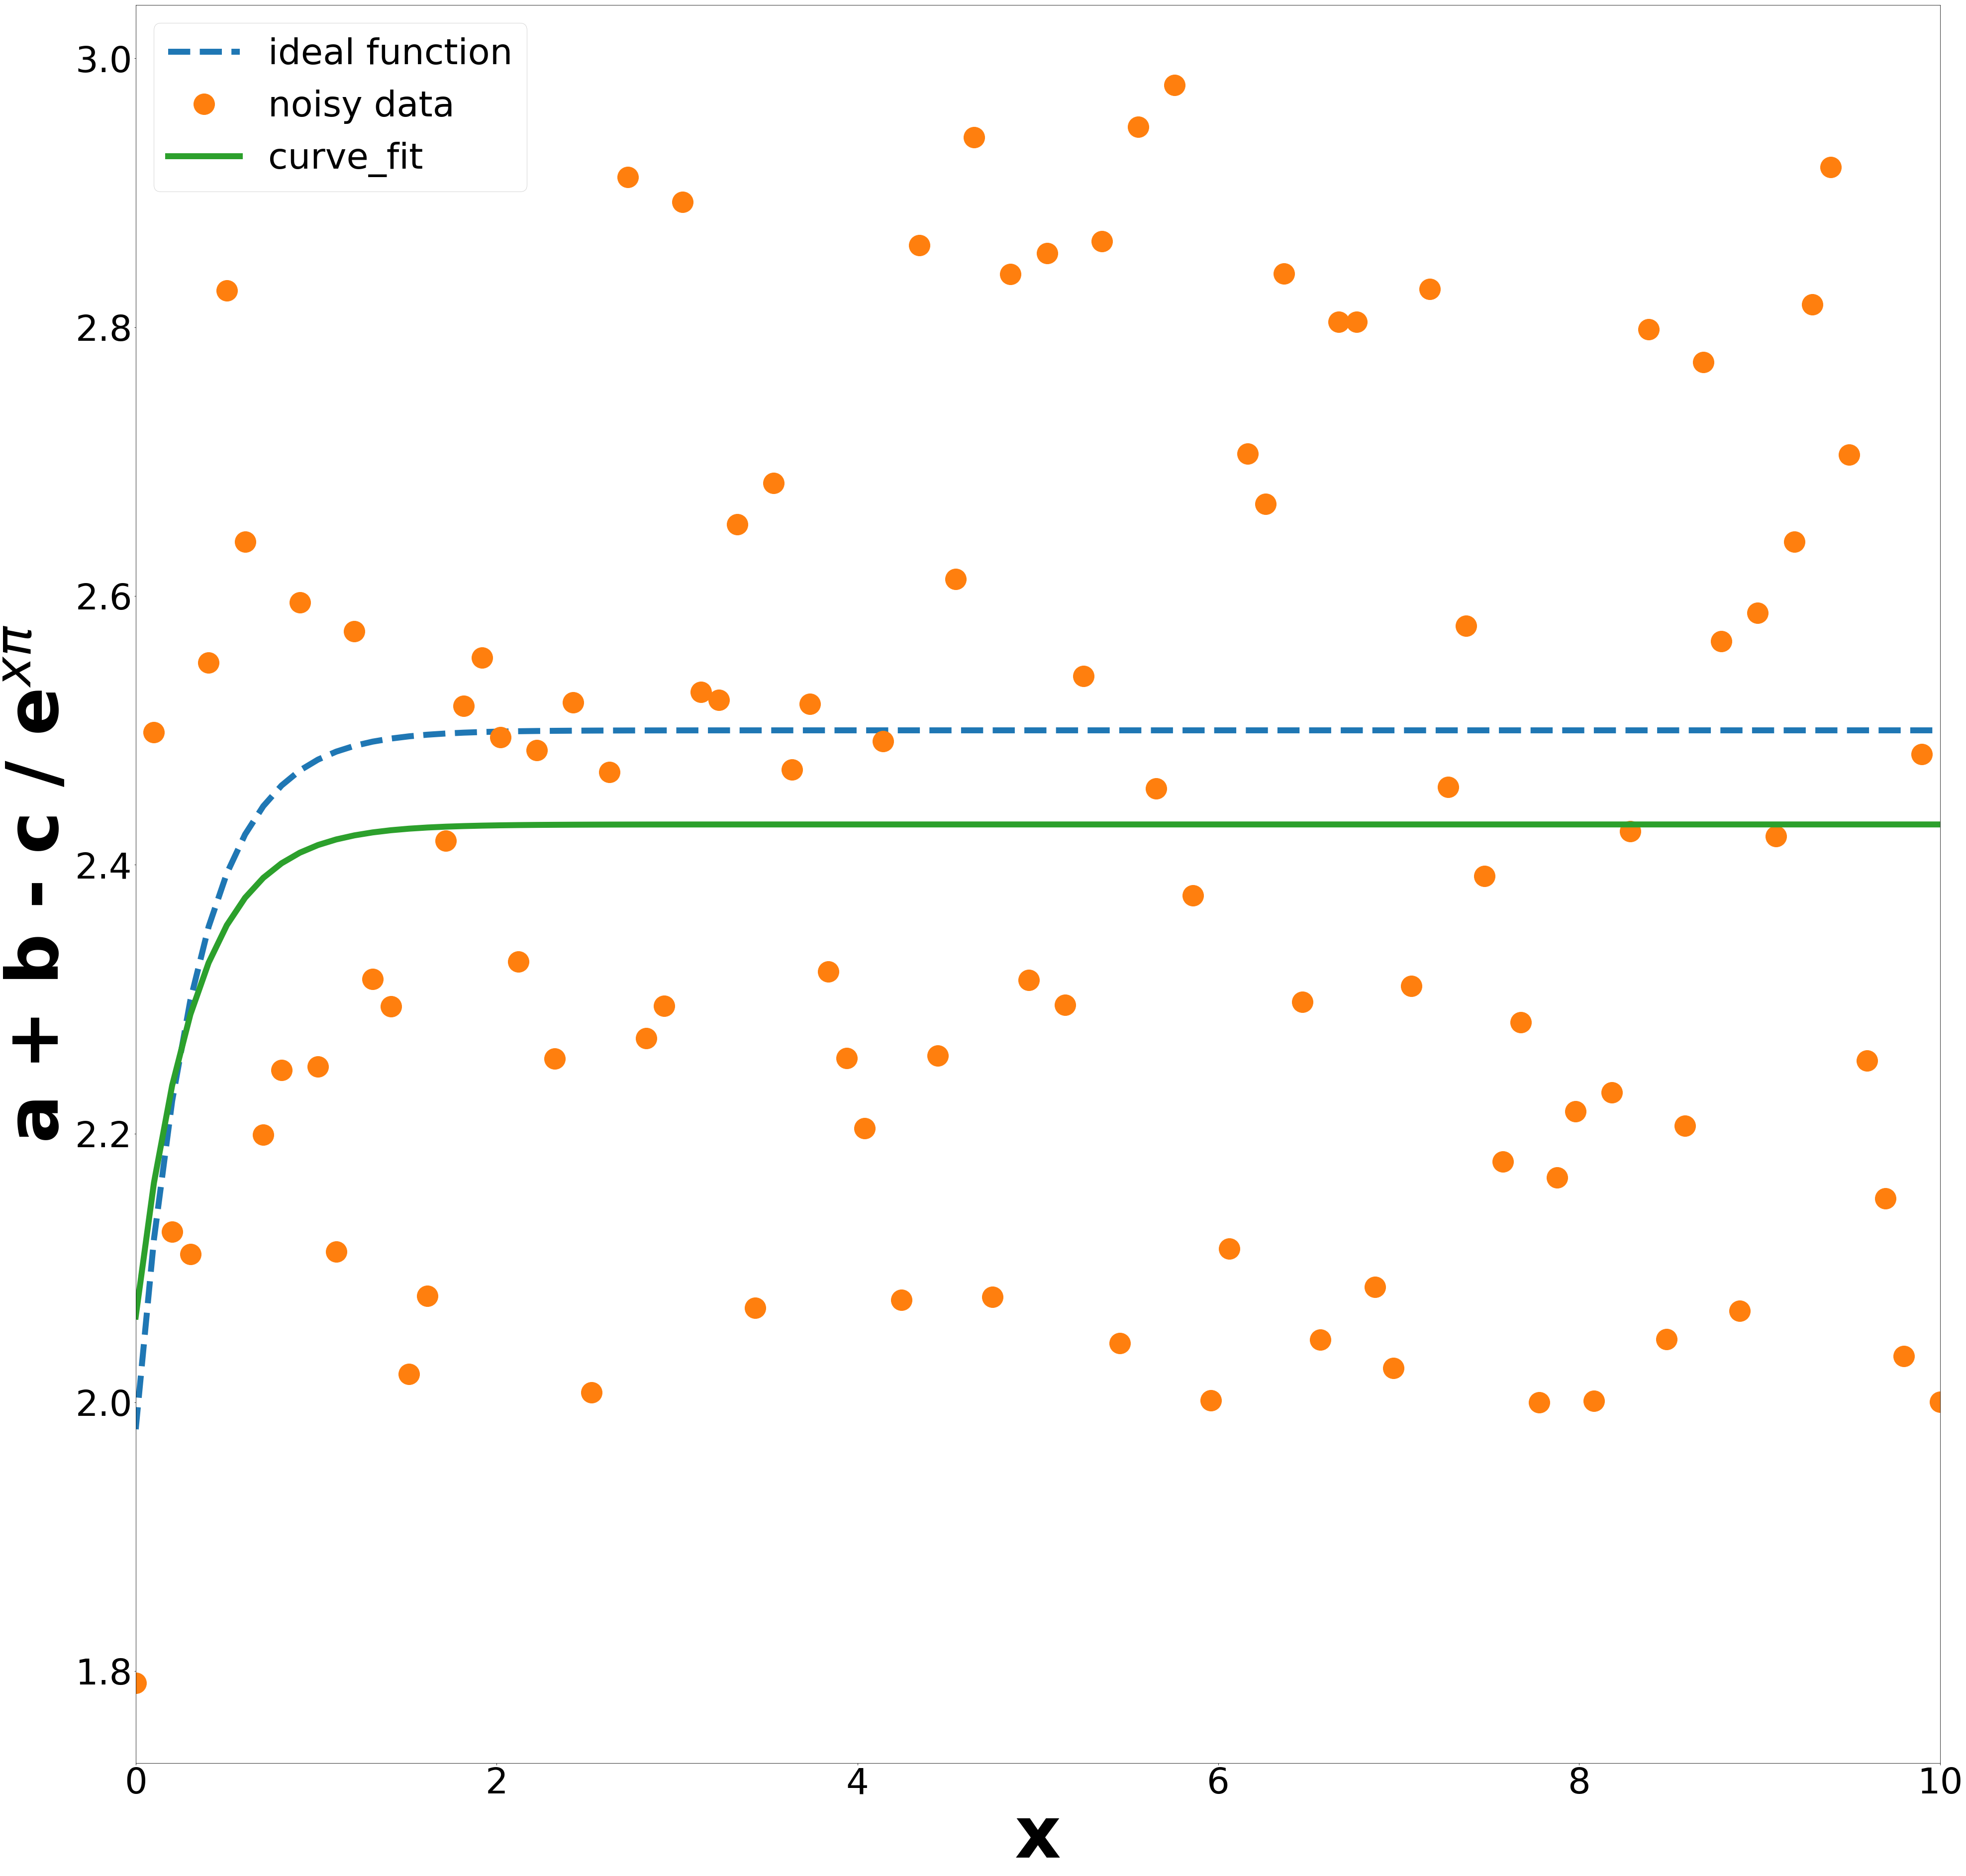

In [161]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as image

#plt.figure(figsize=[10, 6])


#define the function
f = lambda x,a,b,c: a - b * c / np.exp(x*np.pi)

#define the paramters for the plot
x_min, x_max = 0, 10
npoints = 100
a,b,c = 2.5, 1.3, 0.4

x = np.linspace(x_min, x_max, npoints)
y = f(x,a,b,c) + np.random.rand(npoints) - 0.5

#do the curve fit
params, extras = curve_fit(f, x, y)

image.rcParams["figure.figsize"] = [65, 65] 
plt.plot(x,f(x,a,b,c), '--', label='ideal function', linewidth=12)
plt.plot(x,y, 'o', label='noisy data', linewidth=12, markersize=42)
plt.plot(x,f(x,params[0],params[1],params[2]), label='curve_fit', linewidth=12)

plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('a + b - c / e$^{x\pi}$', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.xlim([x_min, x_max])
plt.legend(fontsize=72)
plt.show()